In [1]:
import mediapipe as mp
import cv2
import numpy as np 
import uuid
import os


keys=[["Q","W","E","R","T","Y","U","I","O","P"],
      ["A","S","D","F","G","H","J","K","L",";"],
      ["Z","X","C","V","B","N","M",",",".","/"]]


mp_drawing=mp.solutions.drawing_utils
mp_hands=mp.solutions.hands

In [2]:
def get_label(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x,hand.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

In [3]:
from time import sleep
def findDistance(num):
    p1x=results.multi_hand_landmarks[num].landmark[mp_hands.HandLandmark.THUMB_TIP].x
    p1y=results.multi_hand_landmarks[num].landmark[mp_hands.HandLandmark.THUMB_TIP].y
    p2x=results.multi_hand_landmarks[num].landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x
    p2y=results.multi_hand_landmarks[num].landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y
    distancey=math.sqrt(((p1x-p2x)**2)+((p1y-p2y)**2))
    return distancey

In [4]:
import mediapipe as mp
import cv2

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

In [5]:
#EXTRA-SMALL ONE
xi=[249,283,312,345,375,411,442,473,503,538,252,281,312,341,377,411,443,475,507,537,255,280,315,347,377,411,442,476,510,543,259,300,342,373,404,432,531]
yi=[91,90,86,83,82,79,79,79,72,71,128,130,125,125,120,115,120,115,115,115,175,172,169,165,166,162,163,162,161,156,215,214,215,212,210,211,205]
ltr=['q','w','e','r','t','y','u','i','o','p','a','s','d','f','g','h','j','k','l',';','z','x','c','v','b','n','m',',','.','/',' ',' ',' ',' ',' ',' ','*']
dist=[1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000]

In [6]:
import math
mini=10000
mindex=0
def find_dis(x,y):
    mini=10000
    for i in range(len(dist)):
        dist[i]=math.sqrt(((x-xi[i])**2)+((y-yi[i])**2))
        if dist[i]<mini:
            mini=dist[i]
            mindex=i
    return mindex

In [7]:
from matplotlib import pyplot as plt

In [8]:
joint_list = [[8,6,5], [12,10,9], [16,14,13], [20,18,17],[4,3,2]]

In [9]:
def draw_finger_angles(image, results, joint_list):
    
    # Loop through hands
    for hand in results.multi_hand_landmarks:
        #Loop through joint sets 
        for joint in joint_list:
            a = np.array([hand.landmark[joint[0]].x, hand.landmark[joint[0]].y]) # First coord
            b = np.array([hand.landmark[joint[1]].x, hand.landmark[joint[1]].y]) # Second coord(mid pt.)
            c = np.array([hand.landmark[joint[2]].x, hand.landmark[joint[2]].y]) # Third coord
            
            radians = np.arctan2(c[1] - b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
            angle = np.abs(radians*180.0/np.pi)
            
            if angle > 180.0:
                angle = 360-angle
                
            cv2.putText(image, str(round(angle, 2)), tuple(np.multiply(b, [640, 480]).astype(int)),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
    return image

In [10]:
def draw_finger_angles(image, results, joint_list,lst,lst2):
    if len(results.multi_hand_landmarks)==1:
        # Loop through hands
        for hand in results.multi_hand_landmarks:
            
            #Loop through joint sets 
            tmp=0
            for joint in joint_list:
                a = np.array([hand.landmark[joint[0]].x, hand.landmark[joint[0]].y]) # First coord
                b = np.array([hand.landmark[joint[1]].x, hand.landmark[joint[1]].y]) # Second coord(mid pt.)
                c = np.array([hand.landmark[joint[2]].x, hand.landmark[joint[2]].y]) # Third coord
                
                radians = np.arctan2(c[1] - b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
                angle = np.abs(radians*180.0/np.pi)
                
                if angle > 180.0:
                    angle = 360-angle
                lst[tmp]=round(angle, 2)
                cv2.putText(image, str(round(angle, 2)), tuple(np.multiply(b, [640, 480]).astype(int)),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
                tmp+=1
    elif len(results.multi_hand_landmarks)==2:
        h1=0
        # Loop through hands
        for hand in results.multi_hand_landmarks:
            #Loop through joint sets 
            if h1==0:
                tmp=0
                for joint in joint_list:
                    a = np.array([hand.landmark[joint[0]].x, hand.landmark[joint[0]].y]) # First coord
                    b = np.array([hand.landmark[joint[1]].x, hand.landmark[joint[1]].y]) # Second coord(mid pt.)
                    c = np.array([hand.landmark[joint[2]].x, hand.landmark[joint[2]].y]) # Third coord
                    
                    radians = np.arctan2(c[1] - b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
                    angle = np.abs(radians*180.0/np.pi)
                    
                    if angle > 180.0:
                        angle = 360-angle
                    lst[tmp]=round(angle, 2)
                    cv2.putText(image, str(round(angle, 2)), tuple(np.multiply(b, [640, 480]).astype(int)),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
                    tmp+=1
            elif h1==1:
                tmp=0
                for joint in joint_list:
                    a = np.array([hand.landmark[joint[0]].x, hand.landmark[joint[0]].y]) # First coord
                    b = np.array([hand.landmark[joint[1]].x, hand.landmark[joint[1]].y]) # Second coord(mid pt.)
                    c = np.array([hand.landmark[joint[2]].x, hand.landmark[joint[2]].y]) # Third coord
                    
                    radians = np.arctan2(c[1] - b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
                    angle = np.abs(radians*180.0/np.pi)
                    
                    if angle > 180.0:
                        angle = 360-angle
                    lst2[tmp]=round(angle, 2)
                    cv2.putText(image, str(round(angle, 2)), tuple(np.multiply(b, [640, 480]).astype(int)),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
                    tmp+=1
            h1+=1
    return image

In [11]:
def draw_finger_angles(image, results, joint_list,lst,lst2,x1,y1,tot1,tot2):
    
    # Loop through hands
    for hand in results.multi_hand_landmarks:
        #Loop through joint sets 
        tmp=0
        for joint in joint_list:
            a = np.array([hand.landmark[joint[0]].x, hand.landmark[joint[0]].y]) # First coord
            b = np.array([hand.landmark[joint[1]].x, hand.landmark[joint[1]].y]) # Second coord(mid pt.)
            c = np.array([hand.landmark[joint[2]].x, hand.landmark[joint[2]].y]) # Third coord
            
            radians = np.arctan2(c[1] - b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
            angle = np.abs(radians*180.0/np.pi)
            
            if angle > 180.0:
                angle = 360-angle
            if hand == results.multi_hand_landmarks[0] and tmp==0:
                lst[tmp]=round(angle, 2)
                x1.append(angle)
                tot1.append(angle)
            elif len(results.multi_hand_landmarks)>1 and hand == results.multi_hand_landmarks[1] and tmp==0:
                lst2[tmp]=round(angle, 2)
                y1.append(angle)
                tot2.append(angle)
            if hand == results.multi_hand_landmarks[0] and tmp==4:
                lst[tmp]=round(angle, 2)
                x1.append(angle)
                tot1.append(angle)
            elif len(results.multi_hand_landmarks)>1 and hand == results.multi_hand_landmarks[1] and tmp==4:
                lst2[tmp]=round(angle, 2)
                y1.append(angle)
                tot2.append(angle)
            cv2.putText(image, str(round(angle, 2)), tuple(np.multiply(b, [640, 480]).astype(int)),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            if len(x1) > 30:
                x1.pop(0)
            if len(y1) > 30:
                y1.pop(0)
            tmp+=1
    return image

In [12]:
def get_label1b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x,hand.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label2b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x,hand.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label3b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x,hand.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label4b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.PINKY_TIP].x,hand.landmark[mp_hands.HandLandmark.PINKY_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

In [13]:
#DTW FUNCTION:
def dtw(s, t, window):
    n, m = len(s), len(t)
    w = np.max([window, abs(n-m)])
    dtw_matrix = np.zeros((n+1, m+1))
    
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            dtw_matrix[i, j] = 0
    
    for i in range(1, n+1):
        for j in range(np.max([1, i-w]), np.min([m, i+w])+1):
            cost = abs(s[i-1] - t[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix

#FASTEST OVERALL
import numpy as np

def dtw(s, t, window):
    n, m = len(s), len(t)
    w = max(window, abs(n - m))
    w = max(w, abs(len(s) - len(t)))
    dtw_matrix = np.zeros((n + 1, m + 1))
    dtw_matrix[1:, 1:] = np.inf
    dtw_matrix[0, 0] = 0

    for i in range(1, n + 1):
        for j in range(max(1, i - w), min(m, i + w) + 1):
            cost = abs(s[i - 1] - t[j - 1])
            dtw_matrix[i, j] = cost + min(
                dtw_matrix[i - 1, j],  # insertion
                dtw_matrix[i, j - 1],  # deletion
                dtw_matrix[i - 1, j - 1]  # match/mismatch
            )

    return dtw_matrix[n, m]

In [14]:
def get_label_index(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x,hand.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output
def get_label_middle(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x,hand.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label_ring(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x,hand.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

def get_label_pinky(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.PINKY_TIP].x,hand.landmark[mp_hands.HandLandmark.PINKY_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

In [15]:

def get_label_thumb(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.THUMB_TIP].x,hand.landmark[mp_hands.HandLandmark.THUMB_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

                    
def get_label5b(index,hand,results):
    output=None
    for idx,classification in enumerate(results.multi_handedness):
        if classification.classification[0].index==index:
            #Process results
            label=classification.classification[0].index
            score=classification.classification[0].score
            text='{} {}'.format(label,round(score,2))
            
            #Extract coordinates:
            coords=tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.THUMB_TIP].x,hand.landmark[mp_hands.HandLandmark.THUMB_TIP].y)),
            [640,480]).astype(int))
            
            output=text,coords
            
    return output

In [16]:
import time
import mediapipe as mp
import cv2
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
t=1
xx=[]
yy=[]
cap = cv2.VideoCapture(1)

with mp_hands.Hands(min_detection_confidence=0.6, min_tracking_confidence=0.5,max_num_hands=1) as hands:
    while cap.isOpened():
        ret, frame = cap.read()

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        results = hands.process(image)
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                index_finger_tip = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP]
                image_height, image_width, _ = image.shape
                x, y = int(index_finger_tip.x * image_width), int(index_finger_tip.y * image_height)
                cv2.putText(image, f"({x}, {y})", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
                mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                if t%100==0:
                    xx.append(x)
                    yy.append(y)
                    sleep(1.0)
                t+=1
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [17]:
xx

[545,
 547,
 549,
 468,
 512,
 512,
 577,
 529,
 571,
 556,
 574,
 605,
 604,
 552,
 552,
 622,
 585]

In [19]:
yy

[81,
 79,
 82,
 83,
 83,
 87,
 83,
 81,
 82,
 85,
 139,
 137,
 137,
 138,
 136,
 138,
 137,
 139,
 140,
 141,
 199,
 194,
 191,
 191,
 192,
 194,
 196,
 192,
 194,
 192,
 252,
 253,
 251,
 255,
 257,
 251,
 252]

In [17]:
#EXTRA-SMALL ONE
xi=[94,135,170,216,258,298,340,378,421,461,95,136,171,213,258,294,342,377,420,463,95,136,174,218,258,300,340,380,417,462,95,132,181,221,285,320,420]
yi=[110,112,115,114,117,115,117,116,122,118,168,168,171,173,173,173,172,177,176,175,224,221,224,225,228,230,230,231,233,234,280,281,282,284,285,290,294]
ltr=['q','w','e','r','t','y','u','i','o','p','a','s','d','f','g','h','j','k','l',';','z','x','c','v','b','n','m',',','.','/',' ',' ',' ',' ',' ',' ','*']
dist=[1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000]

In [18]:
#EXTRA-SMALL ONE
xi=[112,158,200,241,280,324,365,402,445,483,114,155,196,238,281,324,363,403,445,485,115,154,195,238,283,325,365,401,439,481,110,151,185,238,283,335,465]
yi=[108,109,110,111,113,114,118,116,119,120,168,170,168,169,170,171,172,173,178,178,223,220,2233,222,225,231,230,233,233,233,283,283,283,283,283,286,294]
ltr=['q','w','e','r','t','y','u','i','o','p','a','s','d','f','g','h','j','k','l',';','z','x','c','v','b','n','m',',','.','/',' ',' ',' ',' ',' ',' ','*']
dist=[1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000]

In [19]:
#EXTRA-SMALL ONE
xi=[109,153,194,238,275,315,356,400,440,480,105,148,189,230,277,317,356,399,435,475,104,145,185,230,269,310,350,391,430,475,103,155,200,245,290,325,457]
yi=[107,107,103,105,115,114,115,117,115,117,162,160,162,166,167,167,168,170,176,170,215,215,216,220,221,222,223,228,231,225,279,275,280,281,284,286,288]
ltr=['q','w','e','r','t','y','u','i','o','p','a','s','d','f','g','h','j','k','l',';','z','x','c','v','b','n','m',',','.','/',' ',' ',' ',' ',' ',' ','*']
dist=[1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000]

In [20]:
#EXTRA-SMALL ONE
xi=[130,169,211,252,293,335,373,414,458,493,127,167,209,250,291,334,372,414,458,495,128,164,214,251,293,332,376,409,455,494,125,171,213,258,298,347,477]
yi=[117,118,116,122,120,123,121,123,127,129,172,172,173,172,172,175,171,178,179,178,231,230,232,229,230,235,235,231,236,230,289,291,291,289,293,295,296]
ltr=['q','w','e','r','t','y','u','i','o','p','a','s','d','f','g','h','j','k','l',';','z','x','c','v','b','n','m',',','.','/',' ',' ',' ',' ',' ',' ','*']
dist=[1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000]

In [21]:
#EXTRA-SMALL ONE
xi=[140,186,227,266,309,347,389,430,474,514,143,186,224,266,305,348,389,428,473,517,143,184,222,268,309,350,390,430,474,514,149,191,230,287,331,371,499,610]
yi=[81,79,82,83,83,87,83,81,82,85,139,137,137,138,136,138,137,139,140,141,199,194,191,191,192,194,196,192,194,192,252,253,251,255,257,251,252,204]
ltr=['q','w','e','r','t','y','u','i','o','p','a','s','d','f','g','h','j','k','l',';','z','x','c','v','b','n','m',',','.','/',' ',' ',' ',' ',' ',' ','*',')']
dist=[1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000]

In [22]:
#For ++
import pyautogui
import time

def plus():
    # Press Windows key + P
    pyautogui.hotkey('winleft', 'p')
    time.sleep(1)
    
    # Click at coordinates (100, 200) #duplicate
    pyautogui.click(1164, 200)
    time.sleep(2)
    
    # Click at coordinates (100, 200) #random
    pyautogui.click(440, 440)
    time.sleep(2)
    
    # Click at coordinates (100, 200) #right arrow key
    pyautogui.click(1349, 400)
    time.sleep(2)
    
    # Press Windows key + P
    pyautogui.hotkey('winleft', 'p')
    time.sleep(1)
    
    # Click at coordinates (100, 200) #Extend
    pyautogui.click(1164, 300)
    time.sleep(2)
    
    # Click at coordinates (100, 200) #random
    pyautogui.click(440, 440)
    time.sleep(1)

In [23]:
#For --
import pyautogui
import time

def minus():
    # Press Windows key + P
    pyautogui.hotkey('winleft', 'p')
    time.sleep(1)
    
    # Click at coordinates (100, 200) #duplicate
    pyautogui.click(1164, 200)
    time.sleep(2)
    
    # Click at coordinates (100, 200) #random
    pyautogui.click(440, 440)
    time.sleep(2)
    
    # Click at coordinates (100, 200) #right arrow key
    pyautogui.click(5, 400)
    time.sleep(2)
    
    # Press Windows key + P
    pyautogui.hotkey('winleft', 'p')
    time.sleep(1)
    
    # Click at coordinates (100, 200) #Extend
    pyautogui.click(1164, 300)
    time.sleep(2)
    
    # Click at coordinates (100, 200) #random
    pyautogui.click(440, 440)
    time.sleep(1)

In [26]:
import time

a=[0]*30
b=[0]*30
c=[]
d=[]


flag1=-1
flag2=-1
flag3=-1
flag4=-1
flag5=-1
flag6=-1
flag7=-1
flag8=-1
flag9=-1
flag10=-1
cap = cv2.VideoCapture(1)
stree=""
t=0
lst=[180.00,180.00,180.00,180.00,180.00]
lst2=[180.00,180.00,180.00,180.00,180.00]
start_time = time.time()
with mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.6,max_num_hands=2) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        #print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            # Get the number of detected hands
            num_hands = len(results.multi_hand_landmarks)
            
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                # Draw angles to image from joint list
                draw_finger_angles(image, results, joint_list,lst,lst2,a,b,c,d)
                t+=1
                #Render left or right detection
                if t==100:
                    plus()
                """        
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[1]<170.0:
                            flag1=0
                        if lst[1]>170.0 and flag2==0:
                            if ltr[mindex2]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex2]
                            sleep(0.99)
                            flag2=-1
                    if num_hands==2:
                        if num==0:
                            if lst[1]<170.0:
                                flag2=0
                            if lst[1]>170.0 and flag2==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag2=-1
                        if num==1:
                            if lst2[1]<170.0:
                                flag6=0
                            if lst2[1]>170.0 and flag6==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag6=-1
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[2]<170.0:
                            flag1=0
                        if lst[2]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[2]<170.0:
                                flag3=0
                            if lst[2]>170.0 and flag3==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag3=-1
                        if num==1:
                            if lst2[2]<170.0:
                                flag7=0
                            if lst2[2]>170.0 and flag7==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag7=-1
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[3]<170.0:
                            flag1=0
                        if lst[3]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[3]<170.0:
                                flag4=0
                            if lst[3]>170.0 and flag4==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag4=-1
                        if num==1:
                            if lst2[3]<170.0:
                                flag7=0
                            if lst2[3]>170.0 and flag8==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag8=-1
                """
        # Calculate the elapsed time
        elapsed_time = int(time.time() - start_time) 
        # Draw the timer text on the image
        timer_text = f"Timer: {elapsed_time} s"
        cv2.putText(image, timer_text, (image.shape[1] - 200, image.shape[0] - 20),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

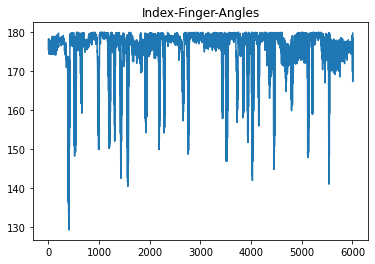

In [66]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(c))]
plt.plot(t1, c)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

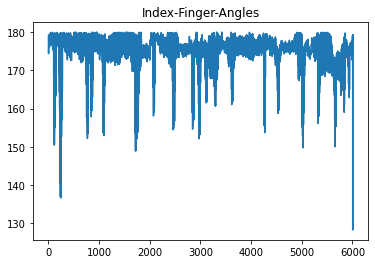

In [67]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(d))]
plt.plot(t1, d)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

# Evaluation:

## Plotting confusion matrix for all letters at different speeds. Per key 10 touches.(DON'T RUN)

#### Very Slow Typing:

In [84]:
expLetter1=['a','a','a','a','a','a','a','a','a','a','b','b','b','b','b','b','b','b','b','b','c','c','c','c','c','c','c','c','c','c','d','d','d','d','d','d','d','d','d','d','e','e','e','e','e','e','e','e','e','e','f','f','f','f','f','f','f','f','f','f','g','g','g','g','g','g','g','g','g','g','h','h','h','h','h','h','h','h','h','h','i','i','i','i','i','i','i','i','i','i','j','j','j','j','j','j','j','j','j','j','k','k','k','k','k','k','k','k','k','k','l','l','l','l','l','l','l','l','l','l','m','m','m','m','m','m','m','m','m','m','n','n','n','n','n','n','n','n','n','n','o','o','o','o','o','o','o','o','o','o','p','p','p','p','p','p','p','p','p','p','q','q','q','q','q','q','q','q','q','q','r','r','r','r','r','r','r','r','r','r','s','s','s','s','s','s','s','s','s','s','t','t','t','t','t','t','t','t','t','t','u','u','u','u','u','u','u','u','u','u','v','v','v','v','v','v','v','v','v','v','w','w','w','w','w','w','w','w','w','w','x','x','x','x','x','x','x','x','x','x','y','y','y','y','y','y','y','y','y','y','z','z','z','z','z','z','z','z','z','z',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',',',',',',',',',',',',',',',',',',',',','.','.','.','.','.','.','.','.','.','.','/','/','/','/','/','/','/','/','/','/',';',';',';',';',';',';',';',';',';',';','back','back','back','back','back','back','back','back','back','back']

In [85]:
len(expLetter1)

320

In [88]:
import time

a=[0]*30
b=[0]*30
c=[]
d=[]
pred1=[]

flag1=-1
flag2=-1
flag3=-1
flag4=-1
flag5=-1
flag6=-1
flag7=-1
flag8=-1
flag9=-1
flag10=-1
cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00,180.00]
lst2=[180.00,180.00,180.00,180.00,180.00]
start_time = time.time()
with mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.6,max_num_hands=2) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        #print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            # Get the number of detected hands
            num_hands = len(results.multi_hand_landmarks)
            
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                # Draw angles to image from joint list
                draw_finger_angles(image, results, joint_list,lst,lst2,a,b,c,d)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    mindex1=find_dis(coord1[0],coord1[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[0]<155.0:
                            flag1=0
                        if lst[0]>155.0 and flag1==0:
                            if ltr[mindex1]=="*":
                                stree=stree[0:-1]
                                pred1.append('back')
                                print('back')
                            else:
                                stree=stree+ltr[mindex1]
                                pred1.append(ltr[mindex1])
                                print(ltr[mindex1])
                            sleep(0.99)
                            flag1=-1
                    if num_hands==2:
                        if num==0:
                            if lst[0]<165.0:
                                flag1=0
                            if lst[0]>165.0 and flag1==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                    pred1.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex1]
                                    pred1.append(ltr[mindex1])
                                    print(ltr[mindex1])
                                sleep(0.99)
                                flag1=-1
                        if num==1:
                            if lst2[0]<165.0:
                                flag5=0
                            if lst2[0]>165.0 and flag5==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                    pred1.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex1]
                                    pred1.append(ltr[mindex1])
                                    print(ltr[mindex1])
                                sleep(0.99)
                                flag5=-1
                """"""                
                if get_label5b(num,hand,results):
                    text5,coord5=get_label_thumb(num,hand,results)
                    mindex5=find_dis(coord5[0],coord5[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[4]<160.0:
                            flag9=0
                        if lst[4]>160.0 and flag9==0:
                            if ltr[mindex5]=="*":
                                stree=stree[0:-1]
                                pred1.append('back')
                                print('back')
                            else:
                                stree=stree+ltr[mindex5]
                                pred1.append(ltr[mindex5])
                                print(ltr[mindex5])
                            sleep(0.99)
                            flag9=-1
                    if num_hands==2:
                        if num==0:
                            if lst[4]<160.0:
                                flag9=0
                            if lst[4]>160.0 and flag9==0:
                                if ltr[mindex5]=="*":
                                    stree=stree[0:-1]
                                    pred1.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex5]
                                    pred1.append(ltr[mindex5])
                                    print(ltr[mindex5])
                                sleep(0.99)
                                flag9=-1
                        if num==1:
                            if lst2[4]<160.0:
                                flag10=0
                            if lst2[4]>160.0 and flag10==0:
                                if ltr[mindex5]=="*":
                                    stree=stree[0:-1]
                                    pred1.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex5]
                                    pred1.append(ltr[mindex5])
                                    print(ltr[mindex5])
                                sleep(0.99)
                                flag10=-1
                """   
                """
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[1]<170.0:
                            flag1=0
                        if lst[1]>170.0 and flag2==0:
                            if ltr[mindex2]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex2]
                            sleep(0.99)
                            flag2=-1
                    if num_hands==2:
                        if num==0:
                            if lst[1]<170.0:
                                flag2=0
                            if lst[1]>170.0 and flag2==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag2=-1
                        if num==1:
                            if lst2[1]<170.0:
                                flag6=0
                            if lst2[1]>170.0 and flag6==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag6=-1
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[2]<170.0:
                            flag1=0
                        if lst[2]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[2]<170.0:
                                flag3=0
                            if lst[2]>170.0 and flag3==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag3=-1
                        if num==1:
                            if lst2[2]<170.0:
                                flag7=0
                            if lst2[2]>170.0 and flag7==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag7=-1
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[3]<170.0:
                            flag1=0
                        if lst[3]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[3]<170.0:
                                flag4=0
                            if lst[3]>170.0 and flag4==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag4=-1
                        if num==1:
                            if lst2[3]<170.0:
                                flag7=0
                            if lst2[3]>170.0 and flag8==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag8=-1
                """"""
        # Calculate the elapsed time
        elapsed_time = int(time.time() - start_time) 
        # Draw the timer text on the image
        timer_text = f"Timer: {elapsed_time} s"
        cv2.putText(image, timer_text, (image.shape[1] - 200, image.shape[0] - 20),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        if len(stree)>=40:
            stree=""
        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

a
a
a
a
a
a
a
a
a
a
b
b
b
b
b
b
b
b
b
b
c
c
c
c
c
c
c
c
c
c
d
d
d
d
d
d
d
d
d
d
e
e
e
e
e
e
e
e
e
e
f
f
f
f
f
f
f
f
f
f
g
g
g
g
g
g
g
g
g
g
h
h
h
h
h
h
h
h
h
h
i
i
i
i
i
i
i
i
i
i
j
j
j
j
j
j
j
j
j
j
k
k
k
k
k
k
k
k
k
k
l
o
l
l
l
l
l
l
l
l
m
m
m
m
m
m
m
m
m
m
n
n
n
n
n
n
n
n
n
n
o
o
o
o
o
o
o
o
o
o
p
p
p
p
p
p
p
p
p
p
q
q
q
q
q
q
q
q
q
q
r
r
r
r
r
r
r
r
r
r
s
s
s
s
s
s
s
s
s
s
t
t
t
t
t
t
t
t
t
t
u
u
u
u
u
u
u
u
u
u
v
v
v
v
v
v
v
v
v
v
w
w
w
w
w
w
w
w
w
w
x
x
x
x
x
x
x
x
x
x
y
y
y
y
y
y
y
y
y
y
z
z
z
z
z
z
z
z
z
z
 
 
 
 
 
 
 
 
 
 
,
,
,
,
,
,
,
,
,
,
.
.
.
.
.
.
.
.
.
.
;
;
/
/
/
/
/
/
/
/
;
;
;
;
;
;
;
;
;
;
back
back
back
back
back
back
back
back
back
back


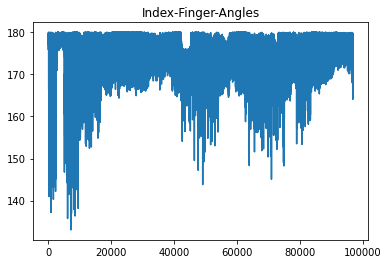

In [89]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(c))]
plt.plot(t1, c)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

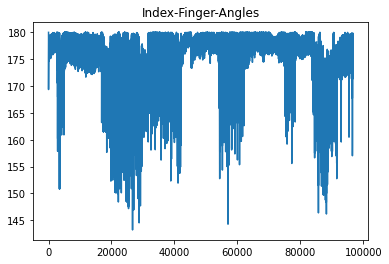

In [90]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(d))]
plt.plot(t1, d)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

In [101]:
t1=elapsed_time

In [102]:
t1

1551

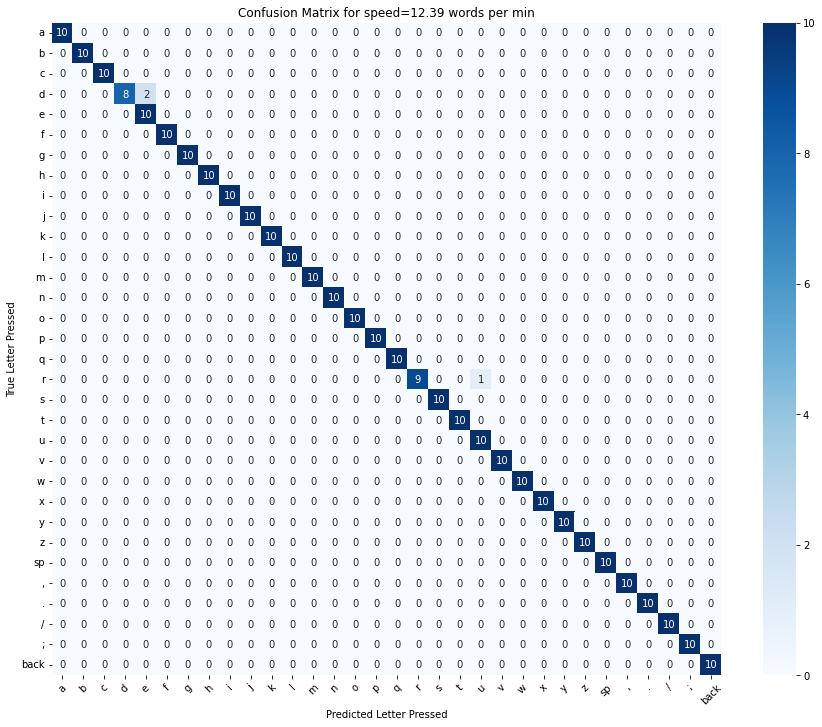

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example ground truth and predicted labels
y_true = expLetter1.copy()
y_pred = pred1.copy()

# Define class names
classes = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','sp',',','.','/',';','back']

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as a heatmap with class names
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix for speed=12.39 words per min')
plt.xlabel('Predicted Letter Pressed')
plt.ylabel('True Letter Pressed')

# Set class labels as tick labels
plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [107]:
# Calculate accuracy
accuracy = np.trace(cm) / np.sum(cm)

print("Accuracy:", accuracy)

Accuracy: 0.990625


#### Slow Typing

In [104]:
expLetter2=['a','a','a','a','a','a','a','a','a','a','b','b','b','b','b','b','b','b','b','b','c','c','c','c','c','c','c','c','c','c','d','d','d','d','d','d','d','d','d','d','e','e','e','e','e','e','e','e','e','e','f','f','f','f','f','f','f','f','f','f','g','g','g','g','g','g','g','g','g','g','h','h','h','h','h','h','h','h','h','h','i','i','i','i','i','i','i','i','i','i','j','j','j','j','j','j','j','j','j','j','k','k','k','k','k','k','k','k','k','k','l','l','l','l','l','l','l','l','l','l','m','m','m','m','m','m','m','m','m','m','n','n','n','n','n','n','n','n','n','n','o','o','o','o','o','o','o','o','o','o','p','p','p','p','p','p','p','p','p','p','q','q','q','q','q','q','q','q','q','q','r','r','r','r','r','r','r','r','r','r','s','s','s','s','s','s','s','s','s','s','t','t','t','t','t','t','t','t','t','t','u','u','u','u','u','u','u','u','u','u','v','v','v','v','v','v','v','v','v','v','w','w','w','w','w','w','w','w','w','w','x','x','x','x','x','x','x','x','x','x','y','y','y','y','y','y','y','y','y','y','z','z','z','z','z','z','z','z','z','z',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',',',',',',',',',',',',',',',',',',',',','.','.','.','.','.','.','.','.','.','.','/','/','/','/','/','/','/','/','/','/',';',';',';',';',';',';',';',';',';',';','back','back','back','back','back','back','back','back','back','back']

In [112]:
len(expLetter2)

320

In [116]:
import time

a=[0]*30
b=[0]*30
c=[]
d=[]
pred2=[]

flag1=-1
flag2=-1
flag3=-1
flag4=-1
flag5=-1
flag6=-1
flag7=-1
flag8=-1
flag9=-1
flag10=-1
cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00,180.00]
lst2=[180.00,180.00,180.00,180.00,180.00]
start_time = time.time()
with mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.6,max_num_hands=2) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        #print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            # Get the number of detected hands
            num_hands = len(results.multi_hand_landmarks)
            
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                # Draw angles to image from joint list
                draw_finger_angles(image, results, joint_list,lst,lst2,a,b,c,d)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    mindex1=find_dis(coord1[0],coord1[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[0]<155.0:
                            flag1=0
                        if lst[0]>155.0 and flag1==0:
                            if ltr[mindex1]=="*":
                                stree=stree[0:-1]
                                pred2.append('back')
                                print('back')
                            else:
                                stree=stree+ltr[mindex1]
                                pred2.append(ltr[mindex1])
                                print(ltr[mindex1])
                            sleep(0.99)
                            flag1=-1
                    if num_hands==2:
                        if num==0:
                            if lst[0]<165.0:
                                flag1=0
                            if lst[0]>165.0 and flag1==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                    pred2.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex1]
                                    pred2.append(ltr[mindex1])
                                    print(ltr[mindex1])
                                sleep(0.99)
                                flag1=-1
                        if num==1:
                            if lst2[0]<165.0:
                                flag5=0
                            if lst2[0]>165.0 and flag5==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                    pred2.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex1]
                                    pred2.append(ltr[mindex1])
                                    print(ltr[mindex1])
                                sleep(0.99)
                                flag5=-1
                """"""                
                if get_label5b(num,hand,results):
                    text5,coord5=get_label_thumb(num,hand,results)
                    mindex5=find_dis(coord5[0],coord5[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[4]<160.0:
                            flag9=0
                        if lst[4]>160.0 and flag9==0:
                            if ltr[mindex5]=="*":
                                stree=stree[0:-1]
                                pred2.append('back')
                                print('back')
                            else:
                                stree=stree+ltr[mindex5]
                                pred2.append(ltr[mindex5])
                                print(ltr[mindex5])
                            sleep(0.99)
                            flag9=-1
                    if num_hands==2:
                        if num==0:
                            if lst[4]<160.0:
                                flag9=0
                            if lst[4]>160.0 and flag9==0:
                                if ltr[mindex5]=="*":
                                    stree=stree[0:-1]
                                    pred2.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex5]
                                    pred2.append(ltr[mindex5])
                                    print(ltr[mindex5])
                                sleep(0.99)
                                flag9=-1
                        if num==1:
                            if lst2[4]<160.0:
                                flag10=0
                            if lst2[4]>160.0 and flag10==0:
                                if ltr[mindex5]=="*":
                                    stree=stree[0:-1]
                                    pred2.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex5]
                                    pred2.append(ltr[mindex5])
                                    print(ltr[mindex5])
                                sleep(0.99)
                                flag10=-1
                """
                """
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[1]<170.0:
                            flag1=0
                        if lst[1]>170.0 and flag2==0:
                            if ltr[mindex2]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex2]
                            sleep(0.99)
                            flag2=-1
                    if num_hands==2:
                        if num==0:
                            if lst[1]<170.0:
                                flag2=0
                            if lst[1]>170.0 and flag2==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag2=-1
                        if num==1:
                            if lst2[1]<170.0:
                                flag6=0
                            if lst2[1]>170.0 and flag6==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag6=-1
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[2]<170.0:
                            flag1=0
                        if lst[2]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[2]<170.0:
                                flag3=0
                            if lst[2]>170.0 and flag3==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag3=-1
                        if num==1:
                            if lst2[2]<170.0:
                                flag7=0
                            if lst2[2]>170.0 and flag7==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag7=-1
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[3]<170.0:
                            flag1=0
                        if lst[3]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[3]<170.0:
                                flag4=0
                            if lst[3]>170.0 and flag4==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag4=-1
                        if num==1:
                            if lst2[3]<170.0:
                                flag7=0
                            if lst2[3]>170.0 and flag8==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag8=-1
                """"""
        # Calculate the elapsed time
        elapsed_time = int(time.time() - start_time) 
        # Draw the timer text on the image
        timer_text = f"Timer: {elapsed_time} s"
        cv2.putText(image, timer_text, (image.shape[1] - 200, image.shape[0] - 20),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        if len(stree)>=40:
            stree=""
        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

a
a
a
a
a
a
a
a
a
a
b
b
b
b
b
b
b
b
b
b
c
c
c
c
c
c
c
c
c
c
d
d
d
d
d
d
d
d
d
d
e
e
e
e
e
e
e
e
e
e
f
f
f
f
f
f
f
f
f
f
f
g
g
g
g
g
g
g
g
g
h
h
h
h
h
h
h
h
h
h
i
i
i
i
i
i
i
i
i
i
j
k
j
k
j
j
j
j
j
j
k
l
k
k
k
k
k
k
k
k
l
l
l
l
p
l
p
p
l
l
m
m
m
m
m
m
m
m
m
m
n
n
n
n
n
n
n
n
n
n
o
o
o
o
o
o
o
o
o
o
p
p
p
p
p
p
p
p
p
p
q
q
q
q
q
q
q
q
q
q
r
r
r
r
r
r
r
r
r
r
s
s
s
s
s
s
s
s
s
s
t
t
t
t
t
t
t
t
t
t
u
u
i
u
u
u
u
u
u
u
v
v
v
v
v
v
v
v
v
v
w
w
w
w
w
w
w
w
w
w
x
x
x
x
x
x
x
x
x
x
y
y
y
y
y
y
y
y
u
y
z
z
z
z
z
z
z
z
z
z
 
 
 
 
 
 
 
 
 
 
,
,
,
,
,
,
,
,
,
,
.
.
l
.
.
.
.
.
.
.
/
/
/
/
/
/
/
/
/
/
;
;
;
;
;
;
;
;
;
;
back
back
back
back
back
back
back
back
/
back


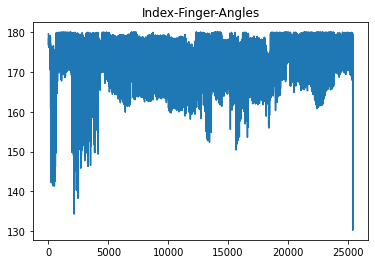

In [117]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(c))]
plt.plot(t1, c)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

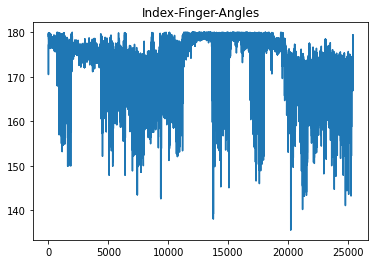

In [118]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(d))]
plt.plot(t1, d)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

In [119]:
t2=elapsed_time

In [120]:
t2

835

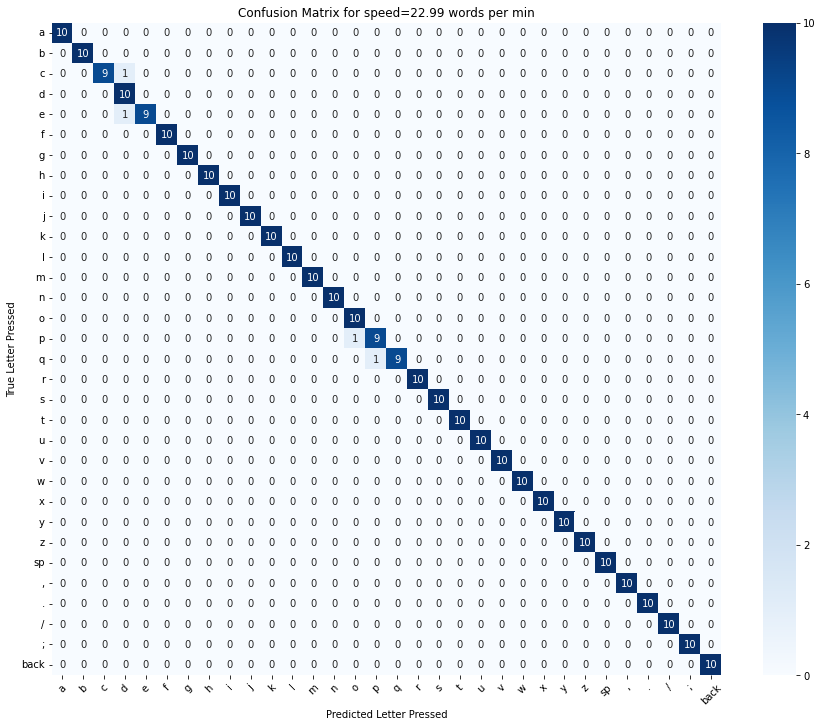

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example ground truth and predicted labels
y_true = expLetter2.copy()
y_pred = pred2.copy()

# Define class names
classes = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','sp',',','.','/',';','back']

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as a heatmap with class names
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix for speed=22.99 words per min')
plt.xlabel('Predicted Letter Pressed')
plt.ylabel('True Letter Pressed')

# Set class labels as tick labels
plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [107]:
# Calculate accuracy
accuracy = np.trace(cm) / np.sum(cm)

print("Accuracy:", accuracy)

Accuracy: 0.9875


#### NORMAL TYPING:

In [126]:
expLetter3=['a','a','a','a','a','a','a','a','a','a','b','b','b','b','b','b','b','b','b','b','c','c','c','c','c','c','c','c','c','c','d','d','d','d','d','d','d','d','d','d','e','e','e','e','e','e','e','e','e','e','f','f','f','f','f','f','f','f','f','f','g','g','g','g','g','g','g','g','g','g','h','h','h','h','h','h','h','h','h','h','i','i','i','i','i','i','i','i','i','i','j','j','j','j','j','j','j','j','j','j','k','k','k','k','k','k','k','k','k','k','l','l','l','l','l','l','l','l','l','l','m','m','m','m','m','m','m','m','m','m','n','n','n','n','n','n','n','n','n','n','o','o','o','o','o','o','o','o','o','o','p','p','p','p','p','p','p','p','p','p','q','q','q','q','q','q','q','q','q','q','r','r','r','r','r','r','r','r','r','r','s','s','s','s','s','s','s','s','s','s','t','t','t','t','t','t','t','t','t','t','u','u','u','u','u','u','u','u','u','u','v','v','v','v','v','v','v','v','v','v','w','w','w','w','w','w','w','w','w','w','x','x','x','x','x','x','x','x','x','x','y','y','y','y','y','y','y','y','y','y','z','z','z','z','z','z','z','z','z','z',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',',',',',',',',',',',',',',',',',',',',','.','.','.','.','.','.','.','.','.','.','/','/','/','/','/','/','/','/','/','/',';',';',';',';',';',';',';',';',';',';','back','back','back','back','back','back','back','back','back','back']

In [127]:
len(expLetter3)

320

In [129]:
import time

a=[0]*30
b=[0]*30
c=[]
d=[]
pred3=[]

flag1=-1
flag2=-1
flag3=-1
flag4=-1
flag5=-1
flag6=-1
flag7=-1
flag8=-1
flag9=-1
flag10=-1
cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00,180.00]
lst2=[180.00,180.00,180.00,180.00,180.00]
start_time = time.time()
with mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.6,max_num_hands=2) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        #print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            # Get the number of detected hands
            num_hands = len(results.multi_hand_landmarks)
            
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                # Draw angles to image from joint list
                draw_finger_angles(image, results, joint_list,lst,lst2,a,b,c,d)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    mindex1=find_dis(coord1[0],coord1[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[0]<155.0:
                            flag1=0
                        if lst[0]>155.0 and flag1==0:
                            if ltr[mindex1]=="*":
                                stree=stree[0:-1]
                                pred3.append('back')
                                print('back')
                            else:
                                stree=stree+ltr[mindex1]
                                pred3.append(ltr[mindex1])
                                print(ltr[mindex1])
                            sleep(0.99)
                            flag1=-1
                    if num_hands==2:
                        if num==0:
                            if lst[0]<165.0:
                                flag1=0
                            if lst[0]>165.0 and flag1==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                    pred3.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex1]
                                    pred3.append(ltr[mindex1])
                                    print(ltr[mindex1])
                                sleep(0.99)
                                flag1=-1
                        if num==1:
                            if lst2[0]<165.0:
                                flag5=0
                            if lst2[0]>165.0 and flag5==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                    pred3.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex1]
                                    pred3.append(ltr[mindex1])
                                    print(ltr[mindex1])
                                sleep(0.99)
                                flag5=-1
                """"""                
                if get_label5b(num,hand,results):
                    text5,coord5=get_label_thumb(num,hand,results)
                    mindex5=find_dis(coord5[0],coord5[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[4]<160.0:
                            flag9=0
                        if lst[4]>160.0 and flag9==0:
                            if ltr[mindex5]=="*":
                                stree=stree[0:-1]
                                pred3.append('back')
                                print('back')
                            else:
                                stree=stree+ltr[mindex5]
                                pred3.append(ltr[mindex5])
                                print(ltr[mindex5])
                            sleep(0.99)
                            flag9=-1
                    if num_hands==2:
                        if num==0:
                            if lst[4]<160.0:
                                flag9=0
                            if lst[4]>160.0 and flag9==0:
                                if ltr[mindex5]=="*":
                                    stree=stree[0:-1]
                                    pred3.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex5]
                                    pred3.append(ltr[mindex5])
                                    print(ltr[mindex5])
                                sleep(0.99)
                                flag9=-1
                        if num==1:
                            if lst2[4]<160.0:
                                flag10=0
                            if lst2[4]>160.0 and flag10==0:
                                if ltr[mindex5]=="*":
                                    stree=stree[0:-1]
                                    pred3.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex5]
                                    pred3.append(ltr[mindex5])
                                    print(ltr[mindex5])
                                sleep(0.99)
                                flag10=-1
                """ 
                """
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[1]<170.0:
                            flag1=0
                        if lst[1]>170.0 and flag2==0:
                            if ltr[mindex2]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex2]
                            sleep(0.99)
                            flag2=-1
                    if num_hands==2:
                        if num==0:
                            if lst[1]<170.0:
                                flag2=0
                            if lst[1]>170.0 and flag2==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag2=-1
                        if num==1:
                            if lst2[1]<170.0:
                                flag6=0
                            if lst2[1]>170.0 and flag6==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag6=-1
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[2]<170.0:
                            flag1=0
                        if lst[2]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[2]<170.0:
                                flag3=0
                            if lst[2]>170.0 and flag3==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag3=-1
                        if num==1:
                            if lst2[2]<170.0:
                                flag7=0
                            if lst2[2]>170.0 and flag7==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag7=-1
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[3]<170.0:
                            flag1=0
                        if lst[3]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[3]<170.0:
                                flag4=0
                            if lst[3]>170.0 and flag4==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag4=-1
                        if num==1:
                            if lst2[3]<170.0:
                                flag7=0
                            if lst2[3]>170.0 and flag8==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag8=-1
                """"""
        # Calculate the elapsed time
        elapsed_time = int(time.time() - start_time) 
        # Draw the timer text on the image
        timer_text = f"Timer: {elapsed_time} s"
        cv2.putText(image, timer_text, (image.shape[1] - 200, image.shape[0] - 20),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        if len(stree)>=40:
            stree=""
        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

a
a
a
a
a
a
a
a
a
a
b
b
b
b
b
b
b
b
b
b
c
c
c
c
c
c
c
c
c
c
d
d
d
d
d
d
d
d
d
d
e
e
e
e
e
e
e
e
e
e
f
f
f
f
f
f
f
f
f
f
g
g
g
g
g
g
g
g
g
g
g
h
h
h
h
h
h
h
h
h
i
i
i
i
i
i
i
i
i
i
j
j
j
j
j
j
j
j
j
j
k
k
k
k
k
k
k
k
k
k
l
l
l
l
l
l
l
l
l
l
m
m
m
m
m
m
m
m
m
m
n
n
n
n
n
n
n
n
n
n
o
o
o
o
o
o
p
p
o
o
p
p
p
p
p
p
p
p
p
p
q
q
q
q
q
q
q
q
q
q
r
r
r
r
r
r
r
r
r
r
s
s
s
s
w
s
s
s
s
s
t
t
t
t
t
y
t
t
t
t
u
u
u
u
u
u
u
u
u
u
v
v
v
v
v
v
v
v
v
v
w
w
w
w
w
w
w
w
w
w
x
x
x
x
x
x
x
s
x
x
y
y
y
y
u
y
y
y
y
y
z
z
z
z
z
z
z
z
z
z
 
 
 
 
 
 
 
 
 
 
,
,
,
,
,
,
,
,
,
.
.
l
.
.
.
.
.
.
.
.
/
/
/
/
/
/
/
/
/
/
;
;
;
;
;
;
;
;
;
;
back
back
back
back
back
back
back
back
back
back


In [130]:
len(pred3)

320

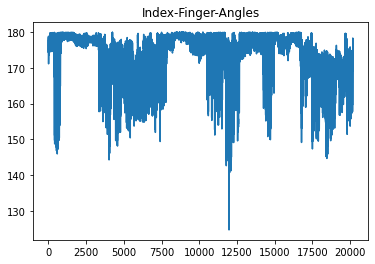

In [131]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(c))]
plt.plot(t1, c)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

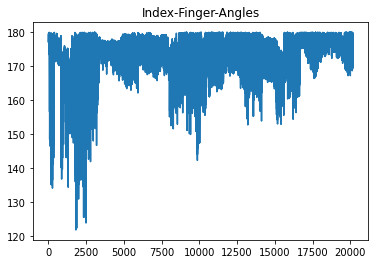

In [132]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(d))]
plt.plot(t1, d)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

In [133]:
t3=elapsed_time

In [134]:
t3

732

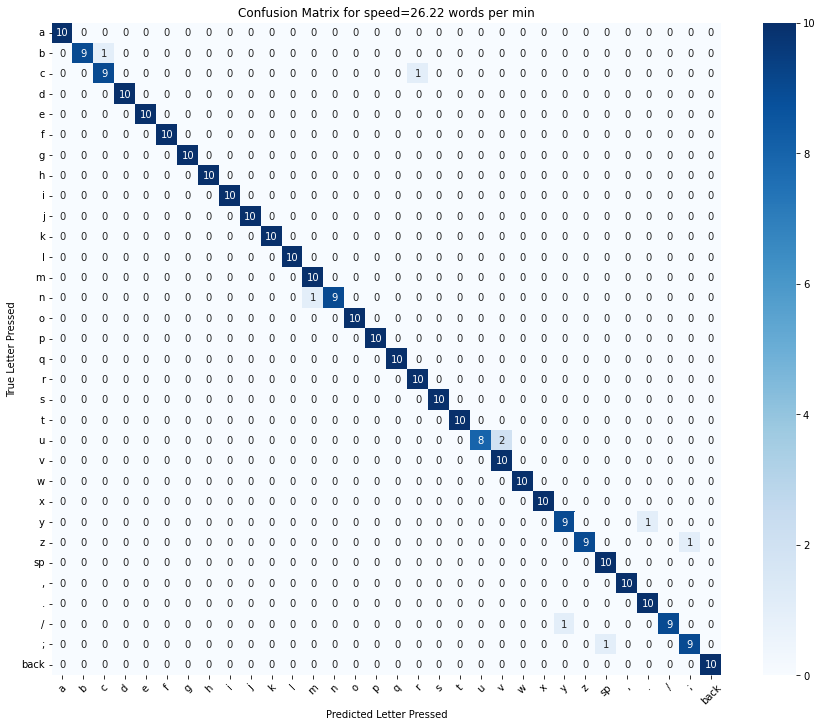

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example ground truth and predicted labels
y_true = expLetter3.copy()
y_pred = pred3.copy()

# Define class names
classes = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','sp',',','.','/',';','back']

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as a heatmap with class names
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix for speed=26.22 words per min')
plt.xlabel('Predicted Letter Pressed')
plt.ylabel('True Letter Pressed')

# Set class labels as tick labels
plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [136]:
# Calculate accuracy
accuracy = np.trace(cm) / np.sum(cm)

print("Accuracy:", accuracy)

Accuracy: 0.971875


#### Fast Typing:

In [144]:
expLetter4=['a','a','a','a','a','a','a','a','a','a','b','b','b','b','b','b','b','b','b','b','c','c','c','c','c','c','c','c','c','c','d','d','d','d','d','d','d','d','d','d','e','e','e','e','e','e','e','e','e','e','f','f','f','f','f','f','f','f','f','f','g','g','g','g','g','g','g','g','g','g','h','h','h','h','h','h','h','h','h','h','i','i','i','i','i','i','i','i','i','i','j','j','j','j','j','j','j','j','j','j','k','k','k','k','k','k','k','k','k','k','l','l','l','l','l','l','l','l','l','l','m','m','m','m','m','m','m','m','m','m','n','n','n','n','n','n','n','n','n','n','o','o','o','o','o','o','o','o','o','o','p','p','p','p','p','p','p','p','p','p','q','q','q','q','q','q','q','q','q','q','r','r','r','r','r','r','r','r','r','r','s','s','s','s','s','s','s','s','s','s','t','t','t','t','t','t','t','t','t','t','u','u','u','u','u','u','u','u','u','u','v','v','v','v','v','v','v','v','v','v','w','w','w','w','w','w','w','w','w','w','x','x','x','x','x','x','x','x','x','x','y','y','y','y','y','y','y','y','y','y','z','z','z','z','z','z','z','z','z','z',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',',',',',',',',',',',',',',',',',',',',','.','.','.','.','.','.','.','.','.','.','/','/','/','/','/','/','/','/','/','/',';',';',';',';',';',';',';',';',';',';','back','back','back','back','back','back','back','back','back','back']

In [145]:
len(expLetter4)

320

In [138]:
import time

a=[0]*30
b=[0]*30
c=[]
d=[]
pred4=[]

flag1=-1
flag2=-1
flag3=-1
flag4=-1
flag5=-1
flag6=-1
flag7=-1
flag8=-1
flag9=-1
flag10=-1
cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00,180.00]
lst2=[180.00,180.00,180.00,180.00,180.00]
start_time = time.time()
with mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.6,max_num_hands=2) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        #print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            # Get the number of detected hands
            num_hands = len(results.multi_hand_landmarks)
            
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                # Draw angles to image from joint list
                draw_finger_angles(image, results, joint_list,lst,lst2,a,b,c,d)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    mindex1=find_dis(coord1[0],coord1[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[0]<155.0:
                            flag1=0
                        if lst[0]>155.0 and flag1==0:
                            if ltr[mindex1]=="*":
                                stree=stree[0:-1]
                                pred4.append('back')
                                print('back')
                            else:
                                stree=stree+ltr[mindex1]
                                pred4.append(ltr[mindex1])
                                print(ltr[mindex1])
                            sleep(0.5)
                            flag1=-1
                    if num_hands==2:
                        if num==0:
                            if lst[0]<165.0:
                                flag1=0
                            if lst[0]>165.0 and flag1==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                    pred4.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex1]
                                    pred4.append(ltr[mindex1])
                                    print(ltr[mindex1])
                                sleep(0.5)
                                flag1=-1
                        if num==1:
                            if lst2[0]<165.0:
                                flag5=0
                            if lst2[0]>165.0 and flag5==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                    pred4.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex1]
                                    pred4.append(ltr[mindex1])
                                    print(ltr[mindex1])
                                sleep(0.5)
                                flag5=-1
                """"""                
                if get_label5b(num,hand,results):
                    text5,coord5=get_label_thumb(num,hand,results)
                    mindex5=find_dis(coord5[0],coord5[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[4]<160.0:
                            flag9=0
                        if lst[4]>160.0 and flag9==0:
                            if ltr[mindex5]=="*":
                                stree=stree[0:-1]
                                pred4.append('back')
                                print('back')
                            else:
                                stree=stree+ltr[mindex5]
                                pred4.append(ltr[mindex5])
                                print(ltr[mindex5])
                            sleep(0.99)
                            flag9=-1
                    if num_hands==2:
                        if num==0:
                            if lst[4]<160.0:
                                flag9=0
                            if lst[4]>160.0 and flag9==0:
                                if ltr[mindex5]=="*":
                                    stree=stree[0:-1]
                                    pred4.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex5]
                                    pred4.append(ltr[mindex5])
                                    print(ltr[mindex5])
                                sleep(0.99)
                                flag9=-1
                        if num==1:
                            if lst2[4]<160.0:
                                flag10=0
                            if lst2[4]>160.0 and flag10==0:
                                if ltr[mindex5]=="*":
                                    stree=stree[0:-1]
                                    pred4.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex5]
                                    pred4.append(ltr[mindex5])
                                    print(ltr[mindex5])
                                sleep(0.99)
                                flag10=-1
                """ 
                """
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[1]<170.0:
                            flag1=0
                        if lst[1]>170.0 and flag2==0:
                            if ltr[mindex2]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex2]
                            sleep(0.99)
                            flag2=-1
                    if num_hands==2:
                        if num==0:
                            if lst[1]<170.0:
                                flag2=0
                            if lst[1]>170.0 and flag2==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag2=-1
                        if num==1:
                            if lst2[1]<170.0:
                                flag6=0
                            if lst2[1]>170.0 and flag6==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag6=-1
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[2]<170.0:
                            flag1=0
                        if lst[2]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[2]<170.0:
                                flag3=0
                            if lst[2]>170.0 and flag3==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag3=-1
                        if num==1:
                            if lst2[2]<170.0:
                                flag7=0
                            if lst2[2]>170.0 and flag7==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag7=-1
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[3]<170.0:
                            flag1=0
                        if lst[3]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[3]<170.0:
                                flag4=0
                            if lst[3]>170.0 and flag4==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag4=-1
                        if num==1:
                            if lst2[3]<170.0:
                                flag7=0
                            if lst2[3]>170.0 and flag8==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag8=-1
                """"""
        # Calculate the elapsed time
        elapsed_time = int(time.time() - start_time) 
        # Draw the timer text on the image
        timer_text = f"Timer: {elapsed_time} s"
        cv2.putText(image, timer_text, (image.shape[1] - 200, image.shape[0] - 20),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        if len(stree)>=40:
            stree=""
        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

a
a
a
a
a
a
a
a
a
a
b
b
b
b
b
b
b
b
b
b
c
c
c
c
c
c
c
c
c
c
d
d
d
d
d
d
d
d
d
d
e
e
e
e
e
e
e
e
e
e
f
f
f
f
f
f
f
f
f
f
y
g
g
g
g
g
g
g
g
g
h
y
h
h
h
h
h
h
h
h
i
i
i
i
i
i
i
i
i
i
u
j
j
j
j
j
j
j
j
j
k
k
k
k
k
k
k
k
k
k
l
l
o
l
l
l
l
l
l
l
m
m
m
m
m
m
m
m
m
m
n
n
n
n
n
n
n
n
n
n
p
p
o
o
o
o
o
o
o
o
p
p
p
p
p
p
p
p
p
p
q
q
q
q
q
q
q
q
q
q
r
r
r
r
r
r
r
r
r
r
s
s
s
s
s
s
s
s
s
s
t
t
t
t
t
t
t
t
t
t
u
i
i
u
u
u
u
u
u
u
v
v
v
v
v
v
v
v
v
v
w
w
w
w
w
w
w
w
w
w
x
x
x
x
x
x
x
x
s
x
y
y
y
y
y
y
y
y
y
y
z
z
z
z
z
z
z
z
z
z
 
 
 
 
 
 
 
 
 
 
,
,
,
,
,
,
,
,
,
,
.
.
.
.
.
.
.
.
.
.
;
/
/
/
/
/
/
/
/
/
/
;
;
;
;
;
;
;
;
;
back
back
back
back
back
back
back
back
back
back


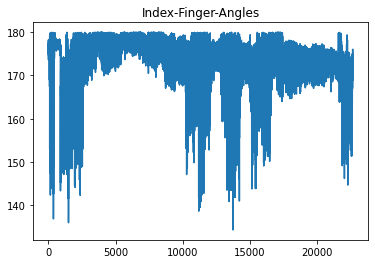

In [139]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(c))]
plt.plot(t1, c)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

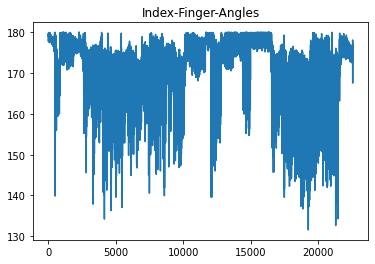

In [140]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(d))]
plt.plot(t1, d)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

In [141]:
t4=elapsed_time

In [142]:
t4

564

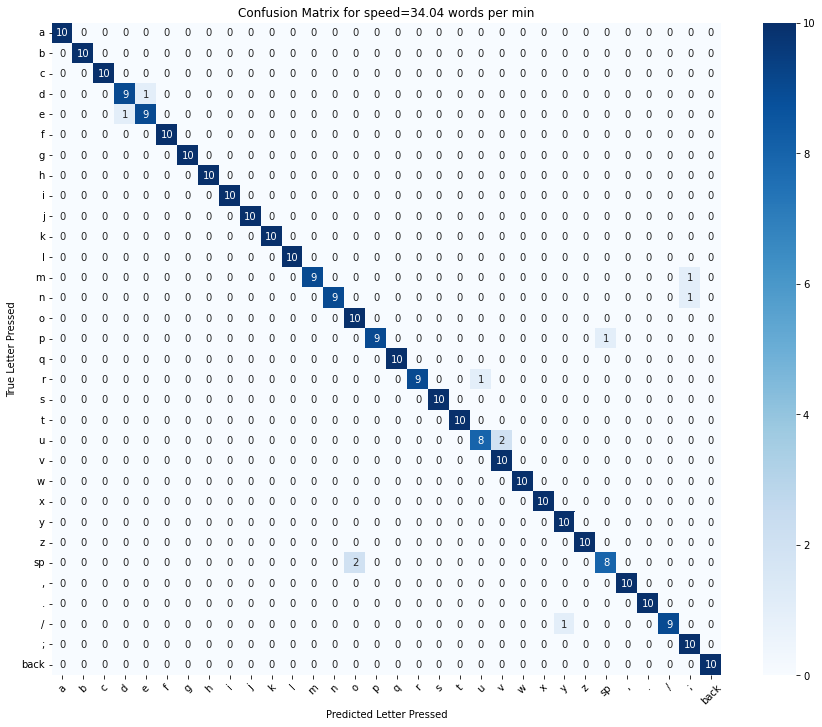

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example ground truth and predicted labels
y_true = expLetter4.copy()
y_pred = pred4.copy()

# Define class names
classes = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','sp',',','.','/',';','back']

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as a heatmap with class names
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix for speed=34.04 words per min')
plt.xlabel('Predicted Letter Pressed')
plt.ylabel('True Letter Pressed')

# Set class labels as tick labels
plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [148]:
# Calculate accuracy
accuracy = np.trace(cm) / np.sum(cm)

print("Accuracy:", accuracy)

Accuracy: 0.965625


#### Very fast typing:

In [149]:
expLetter5=['a','a','a','a','a','a','a','a','a','a','b','b','b','b','b','b','b','b','b','b','c','c','c','c','c','c','c','c','c','c','d','d','d','d','d','d','d','d','d','d','e','e','e','e','e','e','e','e','e','e','f','f','f','f','f','f','f','f','f','f','g','g','g','g','g','g','g','g','g','g','h','h','h','h','h','h','h','h','h','h','i','i','i','i','i','i','i','i','i','i','j','j','j','j','j','j','j','j','j','j','k','k','k','k','k','k','k','k','k','k','l','l','l','l','l','l','l','l','l','l','m','m','m','m','m','m','m','m','m','m','n','n','n','n','n','n','n','n','n','n','o','o','o','o','o','o','o','o','o','o','p','p','p','p','p','p','p','p','p','p','q','q','q','q','q','q','q','q','q','q','r','r','r','r','r','r','r','r','r','r','s','s','s','s','s','s','s','s','s','s','t','t','t','t','t','t','t','t','t','t','u','u','u','u','u','u','u','u','u','u','v','v','v','v','v','v','v','v','v','v','w','w','w','w','w','w','w','w','w','w','x','x','x','x','x','x','x','x','x','x','y','y','y','y','y','y','y','y','y','y','z','z','z','z','z','z','z','z','z','z',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',',',',',',',',',',',',',',',',',',',',','.','.','.','.','.','.','.','.','.','.','/','/','/','/','/','/','/','/','/','/',';',';',';',';',';',';',';',';',';',';','back','back','back','back','back','back','back','back','back','back']

In [150]:
len(expLetter5)

320

In [155]:
import time

a=[0]*30
b=[0]*30
c=[]
d=[]
pred5=[]

flag1=-1
flag2=-1
flag3=-1
flag4=-1
flag5=-1
flag6=-1
flag7=-1
flag8=-1
flag9=-1
flag10=-1
cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00,180.00]
lst2=[180.00,180.00,180.00,180.00,180.00]
start_time = time.time()
with mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.6,max_num_hands=2) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        #print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            # Get the number of detected hands
            num_hands = len(results.multi_hand_landmarks)
            
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                # Draw angles to image from joint list
                draw_finger_angles(image, results, joint_list,lst,lst2,a,b,c,d)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    mindex1=find_dis(coord1[0],coord1[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[0]<155.0:
                            flag1=0
                        if lst[0]>155.0 and flag1==0:
                            if ltr[mindex1]=="*":
                                stree=stree[0:-1]
                                pred5.append('back')
                                print('back')
                            else:
                                stree=stree+ltr[mindex1]
                                pred5.append(ltr[mindex1])
                                print(ltr[mindex1])
                            sleep(0.2)
                            flag1=-1
                    if num_hands==2:
                        if num==0:
                            if lst[0]<165.0:
                                flag1=0
                            if lst[0]>165.0 and flag1==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex1]
                                    pred5.append(ltr[mindex1])
                                    print(ltr[mindex1])
                                sleep(0.2)
                                flag1=-1
                        if num==1:
                            if lst2[0]<170.0:
                                flag5=0
                            if lst2[0]>170.0 and flag5==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex1]
                                    pred5.append(ltr[mindex1])
                                    print(ltr[mindex1])
                                sleep(0.2)
                                flag5=-1
                """"""                
                if get_label5b(num,hand,results):
                    text5,coord5=get_label_thumb(num,hand,results)
                    mindex5=find_dis(coord5[0],coord5[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[4]<160.0:
                            flag9=0
                        if lst[4]>160.0 and flag9==0:
                            if ltr[mindex5]=="*":
                                stree=stree[0:-1]
                                pred5.append('back')
                                print('back')
                            else:
                                stree=stree+ltr[mindex5]
                                pred5.append(ltr[mindex5])
                                print(ltr[mindex5])
                            sleep(0.99)
                            flag9=-1
                    if num_hands==2:
                        if num==0:
                            if lst[4]<160.0:
                                flag9=0
                            if lst[4]>160.0 and flag9==0:
                                if ltr[mindex5]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex5]
                                    pred5.append(ltr[mindex5])
                                    print(ltr[mindex5])
                                sleep(0.99)
                                flag9=-1
                        if num==1:
                            if lst2[4]<160.0:
                                flag10=0
                            if lst2[4]>160.0 and flag10==0:
                                if ltr[mindex5]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex5]
                                    pred5.append(ltr[mindex5])
                                    print(ltr[mindex5])
                                sleep(0.99)
                                flag10=-1
                """   
                """
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[1]<170.0:
                            flag1=0
                        if lst[1]>170.0 and flag2==0:
                            if ltr[mindex2]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex2]
                            sleep(0.99)
                            flag2=-1
                    if num_hands==2:
                        if num==0:
                            if lst[1]<170.0:
                                flag2=0
                            if lst[1]>170.0 and flag2==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag2=-1
                        if num==1:
                            if lst2[1]<170.0:
                                flag6=0
                            if lst2[1]>170.0 and flag6==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag6=-1
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[2]<170.0:
                            flag1=0
                        if lst[2]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[2]<170.0:
                                flag3=0
                            if lst[2]>170.0 and flag3==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag3=-1
                        if num==1:
                            if lst2[2]<170.0:
                                flag7=0
                            if lst2[2]>170.0 and flag7==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag7=-1
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[3]<170.0:
                            flag1=0
                        if lst[3]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[3]<170.0:
                                flag4=0
                            if lst[3]>170.0 and flag4==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag4=-1
                        if num==1:
                            if lst2[3]<170.0:
                                flag7=0
                            if lst2[3]>170.0 and flag8==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag8=-1
                """"""
        # Calculate the elapsed time
        elapsed_time = int(time.time() - start_time) 
        # Draw the timer text on the image
        timer_text = f"Timer: {elapsed_time} s"
        cv2.putText(image, timer_text, (image.shape[1] - 200, image.shape[0] - 20),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        if len(stree)>=10:
            stree=""
        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

a
a
a
a
a
a
a
a
a
a
b
b
b
b
b
b
b
b
b
b
c
c
c
c
c
c
c
c
c
c
d
d
d
d
d
d
d
d
d
d
e
e
e
e
e
e
e
e
e
e
f
f
f
f
f
f
f
f
f
f
g
g
g
t
g
g
g
g
g
g
h
h
h
h
h
h
h
h
h
h
i
i
i
i
i
i
i
i
i
i
k
j
j
j
j
j
j
j
j
j
k
k
k
k
k
k
k
k
k
k
k
l
l
l
l
l
l
l
l
l
m
m
m
m
m
m
m
m
m
m
n
n
n
n
n
n
n
n
n
n
o
o
o
o
p
o
o
o
o
o
p
p
p
p
p
p
p
p
p
p
q
q
q
q
q
q
q
q
q
q
r
r
r
r
r
r
r
r
r
r
s
s
s
s
s
s
s
s
s
s
t
t
t
t
t
t
t
t
t
t
u
u
u
u
i
u
u
u
u
u
v
v
v
v
v
v
v
v
v
v
w
w
w
w
w
w
w
w
w
w
x
x
x
x
x
x
x
x
x
x
y
y
y
y
y
y
y
y
y
y
z
z
z
z
z
z
z
z
z
z
 
 
 
 
 
 
 
 
 
 
 
,
,
,
,
,
,
,
,
,
.
.
.
/
/
.
.
.
.
.
/
/
/
/
/
/
/
/
/
/
;
;
;
;
;
;
;
;
;
;
back
back
back
back
back
back
back
back
back


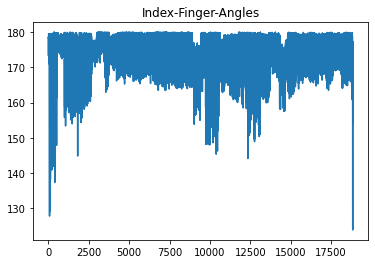

In [161]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(c))]
plt.plot(t1, c)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

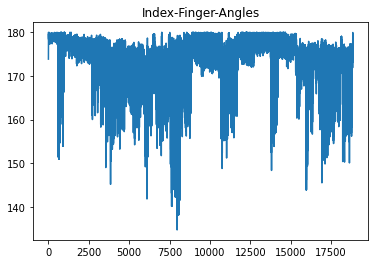

In [162]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(d))]
plt.plot(t1, d)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

In [163]:
t5=elapsed_time

In [164]:
t5

423

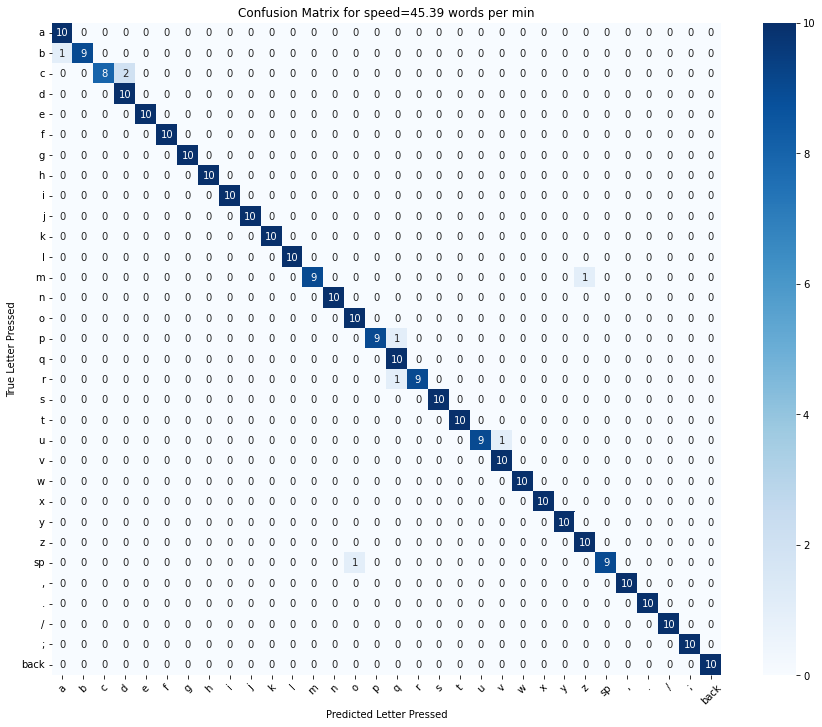

In [165]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example ground truth and predicted labels
y_true = expLetter5.copy()
y_pred = pred5.copy()

# Define class names
classes = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','sp',',','.','/',';','back']

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as a heatmap with class names
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix for speed=39.18 words per min')
plt.xlabel('Predicted Letter Pressed')
plt.ylabel('True Letter Pressed')

# Set class labels as tick labels
plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [166]:
# Calculate accuracy
accuracy = np.trace(cm) / np.sum(cm)

print("Accuracy:", accuracy)

Accuracy: 0.975


#### Intermediate fast typing:

In [32]:
expLetter6=['a','a','a','a','a','a','a','a','a','a','b','b','b','b','b','b','b','b','b','b','c','c','c','c','c','c','c','c','c','c','d','d','d','d','d','d','d','d','d','d','e','e','e','e','e','e','e','e','e','e','f','f','f','f','f','f','f','f','f','f','g','g','g','g','g','g','g','g','g','g','h','h','h','h','h','h','h','h','h','h','i','i','i','i','i','i','i','i','i','i','j','j','j','j','j','j','j','j','j','j','k','k','k','k','k','k','k','k','k','k','l','l','l','l','l','l','l','l','l','l','m','m','m','m','m','m','m','m','m','m','n','n','n','n','n','n','n','n','n','n','o','o','o','o','o','o','o','o','o','o','p','p','p','p','p','p','p','p','p','p','q','q','q','q','q','q','q','q','q','q','r','r','r','r','r','r','r','r','r','r','s','s','s','s','s','s','s','s','s','s','t','t','t','t','t','t','t','t','t','t','u','u','u','u','u','u','u','u','u','u','v','v','v','v','v','v','v','v','v','v','w','w','w','w','w','w','w','w','w','w','x','x','x','x','x','x','x','x','x','x','y','y','y','y','y','y','y','y','y','y','z','z','z','z','z','z','z','z','z','z',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',',',',',',',',',',',',',',',',',',',',','.','.','.','.','.','.','.','.','.','.','/','/','/','/','/','/','/','/','/','/',';',';',';',';',';',';',';',';',';',';','back','back','back','back','back','back','back','back','back','back']

In [33]:
len(expLetter6)

320

In [37]:
import time

a=[0]*30
b=[0]*30
c=[]
d=[]
pred6=[]

flag1=-1
flag2=-1
flag3=-1
flag4=-1
flag5=-1
flag6=-1
flag7=-1
flag8=-1
flag9=-1
flag10=-1
cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00,180.00]
lst2=[180.00,180.00,180.00,180.00,180.00]
start_time = time.time()
with mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.6,max_num_hands=2) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        #print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            # Get the number of detected hands
            num_hands = len(results.multi_hand_landmarks)
            
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                # Draw angles to image from joint list
                draw_finger_angles(image, results, joint_list,lst,lst2,a,b,c,d)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    mindex1=find_dis(coord1[0],coord1[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[0]<155.0:
                            flag1=0
                        if lst[0]>155.0 and flag1==0:
                            if ltr[mindex1]=="*":
                                stree=stree[0:-1]
                                pred6.append('back')
                                print('back')
                            else:
                                stree=stree+ltr[mindex1]
                                pred6.append(ltr[mindex1])
                                print(ltr[mindex1])
                            sleep(0.2)
                            flag1=-1
                    if num_hands==2:
                        if num==0:
                            if lst[0]<165.0:
                                flag1=0
                            if lst[0]>165.0 and flag1==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                    pred6.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex1]
                                    pred6.append(ltr[mindex1])
                                    print(ltr[mindex1])
                                sleep(0.2)
                                flag1=-1
                        if num==1:
                            if lst2[0]<170.0:
                                flag5=0
                            if lst2[0]>170.0 and flag5==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                    pred6.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex1]
                                    pred6.append(ltr[mindex1])
                                    print(ltr[mindex1])
                                sleep(0.2)
                                flag5=-1
                """"""                
                if get_label5b(num,hand,results):
                    text5,coord5=get_label_thumb(num,hand,results)
                    mindex5=find_dis(coord5[0],coord5[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[4]<160.0:
                            flag9=0
                        if lst[4]>160.0 and flag9==0:
                            if ltr[mindex5]=="*":
                                stree=stree[0:-1]
                                pred5.append('back')
                                print('back')
                            else:
                                stree=stree+ltr[mindex5]
                                pred5.append(ltr[mindex5])
                                print(ltr[mindex5])
                            sleep(0.99)
                            flag9=-1
                    if num_hands==2:
                        if num==0:
                            if lst[4]<160.0:
                                flag9=0
                            if lst[4]>160.0 and flag9==0:
                                if ltr[mindex5]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex5]
                                    pred5.append(ltr[mindex5])
                                    print(ltr[mindex5])
                                sleep(0.99)
                                flag9=-1
                        if num==1:
                            if lst2[4]<160.0:
                                flag10=0
                            if lst2[4]>160.0 and flag10==0:
                                if ltr[mindex5]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex5]
                                    pred5.append(ltr[mindex5])
                                    print(ltr[mindex5])
                                sleep(0.99)
                                flag10=-1
                """   
                """
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[1]<170.0:
                            flag1=0
                        if lst[1]>170.0 and flag2==0:
                            if ltr[mindex2]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex2]
                            sleep(0.99)
                            flag2=-1
                    if num_hands==2:
                        if num==0:
                            if lst[1]<170.0:
                                flag2=0
                            if lst[1]>170.0 and flag2==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag2=-1
                        if num==1:
                            if lst2[1]<170.0:
                                flag6=0
                            if lst2[1]>170.0 and flag6==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag6=-1
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[2]<170.0:
                            flag1=0
                        if lst[2]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[2]<170.0:
                                flag3=0
                            if lst[2]>170.0 and flag3==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag3=-1
                        if num==1:
                            if lst2[2]<170.0:
                                flag7=0
                            if lst2[2]>170.0 and flag7==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag7=-1
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[3]<170.0:
                            flag1=0
                        if lst[3]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[3]<170.0:
                                flag4=0
                            if lst[3]>170.0 and flag4==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag4=-1
                        if num==1:
                            if lst2[3]<170.0:
                                flag7=0
                            if lst2[3]>170.0 and flag8==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag8=-1
                """"""
        # Calculate the elapsed time
        elapsed_time = int(time.time() - start_time) 
        # Draw the timer text on the image
        timer_text = f"Timer: {elapsed_time} s"
        cv2.putText(image, timer_text, (image.shape[1] - 200, image.shape[0] - 20),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        if len(stree)>=10:
            stree=""
        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

a
a
a
a
a
a
a
a
a
a
b
b
b
b
b
b
b
b
b
b
c
c
c
c
c
c
c
c
c
c
d
d
d
d
d
d
d
d
d
d
e
e
e
e
e
e
e
e
e
e
f
f
f
f
f
f
f
f
f
f
g
g
g
g
g
g
g
g
g
g
h
h
h
h
h
h
h
h
h
h
i
i
i
o
i
i
i
i
i
i
j
j
j
j
j
j
j
j
j
j
k
k
k
k
k
k
k
k
k
k
l
l
l
l
l
l
l
l
l
l
l
m
m
m
m
m
m
m
m
m
n
n
n
n
n
n
n
n
n
n
o
o
o
o
o
o
o
o
o
o
o
p
p
p
p
p
p
p
p
p
q
q
q
q
q
q
q
q
q
q
r
r
r
r
r
r
r
r
r
r
s
s
s
s
s
s
s
s
s
s
t
t
t
t
t
t
t
t
t
t
u
u
u
u
u
u
u
u
u
u
v
v
v
v
v
v
v
v
v
v
w
w
w
w
w
w
w
w
w
w
x
x
x
x
x
x
x
x
x
x
y
y
y
y
y
y
y
y
y
y
z
z
z
z
z
z
z
z
z
z
z
 
 
 
 
 
 
 
 
 
,
,
,
,
,
,
,
,
,
,
.
.
.
.
.
.
/
.
.
.
/
/
/
/
/
/
/
/
/
/
;
;
;
;
;
;
;
;
;
;
back
back
back
back
back
back
back
back
back
 


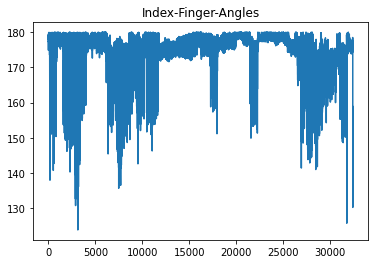

In [39]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(c))]
plt.plot(t1, c)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

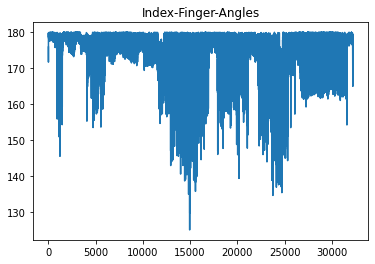

In [40]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(d))]
plt.plot(t1, d)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

In [41]:
t6=elapsed_time

In [42]:
t6

490

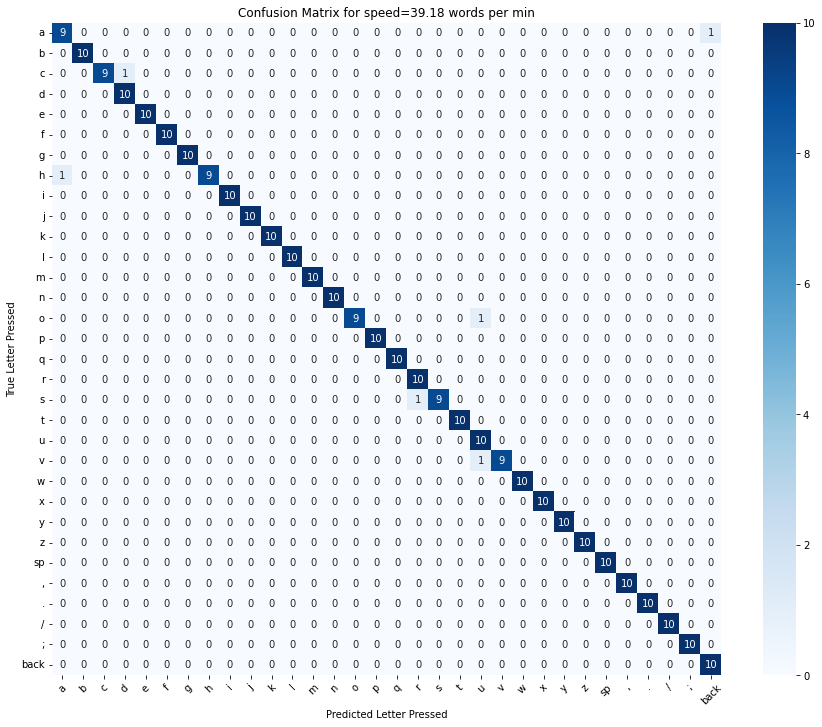

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example ground truth and predicted labels
y_true = expLetter6.copy()
y_pred = pred6.copy()

# Define class names
classes = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','sp',',','.','/',';','back']

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as a heatmap with class names
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix for speed=39.18 words per min')
plt.xlabel('Predicted Letter Pressed')
plt.ylabel('True Letter Pressed')

# Set class labels as tick labels
plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [52]:
# Calculate accuracy
accuracy = np.trace(cm) / np.sum(cm)

print("Accuracy:", accuracy)

Accuracy: 0.98125


#### Intermediate normal- fast typing:

In [53]:
expLetter7=['a','a','a','a','a','a','a','a','a','a','b','b','b','b','b','b','b','b','b','b','c','c','c','c','c','c','c','c','c','c','d','d','d','d','d','d','d','d','d','d','e','e','e','e','e','e','e','e','e','e','f','f','f','f','f','f','f','f','f','f','g','g','g','g','g','g','g','g','g','g','h','h','h','h','h','h','h','h','h','h','i','i','i','i','i','i','i','i','i','i','j','j','j','j','j','j','j','j','j','j','k','k','k','k','k','k','k','k','k','k','l','l','l','l','l','l','l','l','l','l','m','m','m','m','m','m','m','m','m','m','n','n','n','n','n','n','n','n','n','n','o','o','o','o','o','o','o','o','o','o','p','p','p','p','p','p','p','p','p','p','q','q','q','q','q','q','q','q','q','q','r','r','r','r','r','r','r','r','r','r','s','s','s','s','s','s','s','s','s','s','t','t','t','t','t','t','t','t','t','t','u','u','u','u','u','u','u','u','u','u','v','v','v','v','v','v','v','v','v','v','w','w','w','w','w','w','w','w','w','w','x','x','x','x','x','x','x','x','x','x','y','y','y','y','y','y','y','y','y','y','z','z','z','z','z','z','z','z','z','z',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',',',',',',',',',',',',',',',',',',',',','.','.','.','.','.','.','.','.','.','.','/','/','/','/','/','/','/','/','/','/',';',';',';',';',';',';',';',';',';',';','back','back','back','back','back','back','back','back','back','back']

In [54]:
len(expLetter7)

320

In [57]:
import time

a=[0]*30
b=[0]*30
c=[]
d=[]
pred7=[]

flag1=-1
flag2=-1
flag3=-1
flag4=-1
flag5=-1
flag6=-1
flag7=-1
flag8=-1
flag9=-1
flag10=-1
cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00,180.00]
lst2=[180.00,180.00,180.00,180.00,180.00]
start_time = time.time()
with mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.6,max_num_hands=2) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        #print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            # Get the number of detected hands
            num_hands = len(results.multi_hand_landmarks)
            
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                # Draw angles to image from joint list
                draw_finger_angles(image, results, joint_list,lst,lst2,a,b,c,d)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    mindex1=find_dis(coord1[0],coord1[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[0]<155.0:
                            flag1=0
                        if lst[0]>155.0 and flag1==0:
                            if ltr[mindex1]=="*":
                                stree=stree[0:-1]
                                pred7.append('back')
                                print('back')
                            else:
                                stree=stree+ltr[mindex1]
                                pred7.append(ltr[mindex1])
                                print(ltr[mindex1])
                            sleep(0.5)
                            flag1=-1
                    if num_hands==2:
                        if num==0:
                            if lst[0]<165.0:
                                flag1=0
                            if lst[0]>165.0 and flag1==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                    pred7.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex1]
                                    pred7.append(ltr[mindex1])
                                    print(ltr[mindex1])
                                sleep(0.5)
                                flag1=-1
                        if num==1:
                            if lst2[0]<170.0:
                                flag5=0
                            if lst2[0]>170.0 and flag5==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                    pred7.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex1]
                                    pred7.append(ltr[mindex1])
                                    print(ltr[mindex1])
                                sleep(0.5)
                                flag5=-1
                """"""                
                if get_label5b(num,hand,results):
                    text5,coord5=get_label_thumb(num,hand,results)
                    mindex5=find_dis(coord5[0],coord5[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[4]<160.0:
                            flag9=0
                        if lst[4]>160.0 and flag9==0:
                            if ltr[mindex5]=="*":
                                stree=stree[0:-1]
                                pred5.append('back')
                                print('back')
                            else:
                                stree=stree+ltr[mindex5]
                                pred5.append(ltr[mindex5])
                                print(ltr[mindex5])
                            sleep(0.99)
                            flag9=-1
                    if num_hands==2:
                        if num==0:
                            if lst[4]<160.0:
                                flag9=0
                            if lst[4]>160.0 and flag9==0:
                                if ltr[mindex5]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex5]
                                    pred5.append(ltr[mindex5])
                                    print(ltr[mindex5])
                                sleep(0.99)
                                flag9=-1
                        if num==1:
                            if lst2[4]<160.0:
                                flag10=0
                            if lst2[4]>160.0 and flag10==0:
                                if ltr[mindex5]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex5]
                                    pred5.append(ltr[mindex5])
                                    print(ltr[mindex5])
                                sleep(0.99)
                                flag10=-1
                """   
                """
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[1]<170.0:
                            flag1=0
                        if lst[1]>170.0 and flag2==0:
                            if ltr[mindex2]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex2]
                            sleep(0.99)
                            flag2=-1
                    if num_hands==2:
                        if num==0:
                            if lst[1]<170.0:
                                flag2=0
                            if lst[1]>170.0 and flag2==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag2=-1
                        if num==1:
                            if lst2[1]<170.0:
                                flag6=0
                            if lst2[1]>170.0 and flag6==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag6=-1
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[2]<170.0:
                            flag1=0
                        if lst[2]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[2]<170.0:
                                flag3=0
                            if lst[2]>170.0 and flag3==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag3=-1
                        if num==1:
                            if lst2[2]<170.0:
                                flag7=0
                            if lst2[2]>170.0 and flag7==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag7=-1
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[3]<170.0:
                            flag1=0
                        if lst[3]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[3]<170.0:
                                flag4=0
                            if lst[3]>170.0 and flag4==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag4=-1
                        if num==1:
                            if lst2[3]<170.0:
                                flag7=0
                            if lst2[3]>170.0 and flag8==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag8=-1
                """"""
        # Calculate the elapsed time
        elapsed_time = int(time.time() - start_time) 
        # Draw the timer text on the image
        timer_text = f"Timer: {elapsed_time} s"
        cv2.putText(image, timer_text, (image.shape[1] - 200, image.shape[0] - 20),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        if len(stree)>=10:
            stree=""
        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

a
a
a
a
a
a
a
a
a
a
b
b
b
b
b
b
b
b
b
b
c
c
c
c
c
c
c
c
c
c
d
d
d
d
d
d
d
d
d
d
e
e
e
e
e
e
e
e
e
e
f
f
f
f
f
f
f
f
f
f
g
g
g
g
g
g
g
g
g
g
h
h
h
h
h
h
h
h
h
h
i
i
i
i
i
i
i
i
i
i
i
j
j
j
j
j
j
j
j
j
j
k
k
k
k
k
k
k
k
k
l
l
l
l
l
l
l
l
l
l
m
m
m
m
m
m
m
m
m
m
n
n
n
n
n
n
n
n
n
n
o
o
o
o
o
o
o
o
o
o
p
p
p
p
p
p
p
p
p
p
q
q
q
q
q
q
q
q
q
q
r
r
r
r
r
r
r
r
r
r
s
s
s
s
s
s
s
s
s
s
t
t
t
t
t
t
t
t
t
t
u
u
u
u
u
u
u
u
u
u
v
v
v
v
v
v
v
v
v
v
w
w
w
w
w
w
w
w
w
w
x
x
x
x
x
x
x
x
x
x
y
y
y
y
y
y
y
y
y
y
z
z
z
z
z
z
z
z
z
z
 
 
 
 
 
 
 
 
 
 
,
,
,
,
,
,
,
,
,
,
.
.
.
.
.
/
.
.
.
.
/
/
/
/
/
/
/
/
/
/
/
;
;
;
;
;
;
;
;
;
back
back
back
back
back
back
back
back
back
back


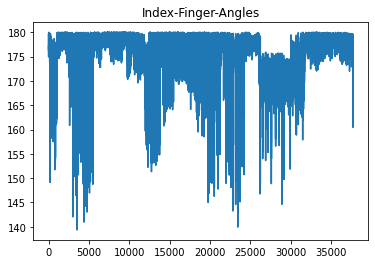

In [58]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(c))]
plt.plot(t1, c)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

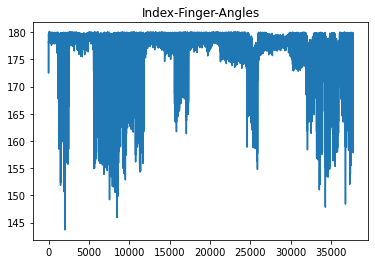

In [59]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(d))]
plt.plot(t1, d)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

In [60]:
t7=elapsed_time

In [61]:
t7

676

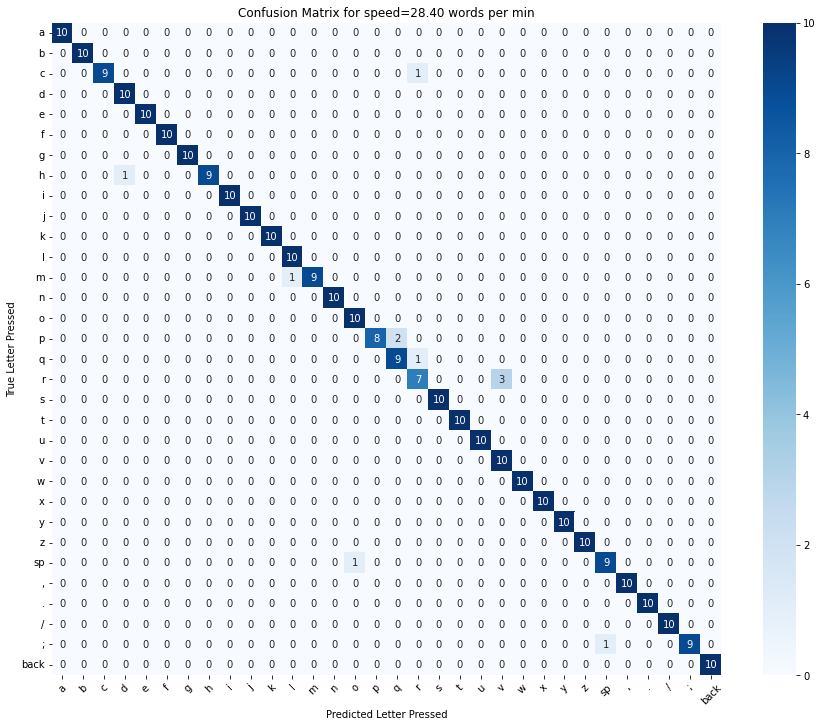

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example ground truth and predicted labels
y_true = expLetter7.copy()
y_pred = pred7.copy()

# Define class names
classes = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','sp',',','.','/',';','back']

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as a heatmap with class names
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix for speed=28.40 words per min')
plt.xlabel('Predicted Letter Pressed')
plt.ylabel('True Letter Pressed')

# Set class labels as tick labels
plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [110]:
# Calculate accuracy
accuracy = np.trace(cm) / np.sum(cm)

print("Accuracy:", accuracy)

Accuracy: 0.965625


#### Slow-normal typing:

In [65]:
expLetter8=['a','a','a','a','a','a','a','a','a','a','b','b','b','b','b','b','b','b','b','b','c','c','c','c','c','c','c','c','c','c','d','d','d','d','d','d','d','d','d','d','e','e','e','e','e','e','e','e','e','e','f','f','f','f','f','f','f','f','f','f','g','g','g','g','g','g','g','g','g','g','h','h','h','h','h','h','h','h','h','h','i','i','i','i','i','i','i','i','i','i','j','j','j','j','j','j','j','j','j','j','k','k','k','k','k','k','k','k','k','k','l','l','l','l','l','l','l','l','l','l','m','m','m','m','m','m','m','m','m','m','n','n','n','n','n','n','n','n','n','n','o','o','o','o','o','o','o','o','o','o','p','p','p','p','p','p','p','p','p','p','q','q','q','q','q','q','q','q','q','q','r','r','r','r','r','r','r','r','r','r','s','s','s','s','s','s','s','s','s','s','t','t','t','t','t','t','t','t','t','t','u','u','u','u','u','u','u','u','u','u','v','v','v','v','v','v','v','v','v','v','w','w','w','w','w','w','w','w','w','w','x','x','x','x','x','x','x','x','x','x','y','y','y','y','y','y','y','y','y','y','z','z','z','z','z','z','z','z','z','z',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',',',',',',',',',',',',',',',',',',',',','.','.','.','.','.','.','.','.','.','.','/','/','/','/','/','/','/','/','/','/',';',';',';',';',';',';',';',';',';',';','back','back','back','back','back','back','back','back','back','back']

In [66]:
len(expLetter8)

320

In [69]:
import time

a=[0]*30
b=[0]*30
c=[]
d=[]
pred8=[]

flag1=-1
flag2=-1
flag3=-1
flag4=-1
flag5=-1
flag6=-1
flag7=-1
flag8=-1
flag9=-1
flag10=-1
cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00,180.00]
lst2=[180.00,180.00,180.00,180.00,180.00]
start_time = time.time()
with mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.6,max_num_hands=2) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        #print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            # Get the number of detected hands
            num_hands = len(results.multi_hand_landmarks)
            
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                # Draw angles to image from joint list
                draw_finger_angles(image, results, joint_list,lst,lst2,a,b,c,d)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    mindex1=find_dis(coord1[0],coord1[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[0]<155.0:
                            flag1=0
                        if lst[0]>155.0 and flag1==0:
                            if ltr[mindex1]=="*":
                                stree=stree[0:-1]
                                pred8.append('back')
                                print('back')
                            else:
                                stree=stree+ltr[mindex1]
                                pred8.append(ltr[mindex1])
                                print(ltr[mindex1])
                            sleep(0.5)
                            flag1=-1
                    if num_hands==2:
                        if num==0:
                            if lst[0]<165.0:
                                flag1=0
                            if lst[0]>165.0 and flag1==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                    pred8.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex1]
                                    pred8.append(ltr[mindex1])
                                    print(ltr[mindex1])
                                sleep(0.5)
                                flag1=-1
                        if num==1:
                            if lst2[0]<170.0:
                                flag5=0
                            if lst2[0]>170.0 and flag5==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                    pred8.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex1]
                                    pred8.append(ltr[mindex1])
                                    print(ltr[mindex1])
                                sleep(0.5)
                                flag5=-1
                """"""                
                if get_label5b(num,hand,results):
                    text5,coord5=get_label_thumb(num,hand,results)
                    mindex5=find_dis(coord5[0],coord5[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[4]<160.0:
                            flag9=0
                        if lst[4]>160.0 and flag9==0:
                            if ltr[mindex5]=="*":
                                stree=stree[0:-1]
                                pred5.append('back')
                                print('back')
                            else:
                                stree=stree+ltr[mindex5]
                                pred5.append(ltr[mindex5])
                                print(ltr[mindex5])
                            sleep(0.99)
                            flag9=-1
                    if num_hands==2:
                        if num==0:
                            if lst[4]<160.0:
                                flag9=0
                            if lst[4]>160.0 and flag9==0:
                                if ltr[mindex5]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex5]
                                    pred5.append(ltr[mindex5])
                                    print(ltr[mindex5])
                                sleep(0.99)
                                flag9=-1
                        if num==1:
                            if lst2[4]<160.0:
                                flag10=0
                            if lst2[4]>160.0 and flag10==0:
                                if ltr[mindex5]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex5]
                                    pred5.append(ltr[mindex5])
                                    print(ltr[mindex5])
                                sleep(0.99)
                                flag10=-1
                """   
                """
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[1]<170.0:
                            flag1=0
                        if lst[1]>170.0 and flag2==0:
                            if ltr[mindex2]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex2]
                            sleep(0.99)
                            flag2=-1
                    if num_hands==2:
                        if num==0:
                            if lst[1]<170.0:
                                flag2=0
                            if lst[1]>170.0 and flag2==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag2=-1
                        if num==1:
                            if lst2[1]<170.0:
                                flag6=0
                            if lst2[1]>170.0 and flag6==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag6=-1
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[2]<170.0:
                            flag1=0
                        if lst[2]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[2]<170.0:
                                flag3=0
                            if lst[2]>170.0 and flag3==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag3=-1
                        if num==1:
                            if lst2[2]<170.0:
                                flag7=0
                            if lst2[2]>170.0 and flag7==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag7=-1
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[3]<170.0:
                            flag1=0
                        if lst[3]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[3]<170.0:
                                flag4=0
                            if lst[3]>170.0 and flag4==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag4=-1
                        if num==1:
                            if lst2[3]<170.0:
                                flag7=0
                            if lst2[3]>170.0 and flag8==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag8=-1
                """"""
        # Calculate the elapsed time
        elapsed_time = int(time.time() - start_time) 
        # Draw the timer text on the image
        timer_text = f"Timer: {elapsed_time} s"
        cv2.putText(image, timer_text, (image.shape[1] - 200, image.shape[0] - 20),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        if len(stree)>=10:
            stree=""
        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

a
a
a
a
a
a
a
a
a
a
b
b
b
b
b
b
b
b
b
b
c
c
c
c
c
c
c
c
c
c
d
d
d
d
d
d
d
d
d
d
e
e
e
e
e
e
e
e
e
e
f
f
f
f
f
f
f
f
f
f
g
g
g
g
g
g
g
g
g
g
h
h
h
h
h
h
h
h
h
h
i
i
i
i
i
i
i
i
i
i
j
j
j
j
j
j
j
j
j
j
l
k
k
k
k
k
k
k
k
k
l
l
l
l
l
l
l
l
l
l
,
m
m
m
m
m
m
m
m
m
n
n
n
n
n
n
n
n
n
n
o
o
o
o
o
o
o
o
o
o
p
p
p
p
p
p
p
p
p
p
q
q
q
q
q
q
q
q
q
q
r
r
r
r
r
r
r
r
r
r
s
s
s
s
s
s
s
s
s
s
t
t
t
t
t
t
t
t
t
t
u
u
u
u
u
u
u
u
u
u
v
v
v
v
v
v
v
v
v
v
w
w
w
w
w
w
w
w
w
w
x
x
x
x
x
x
x
x
x
x
y
y
y
y
y
y
y
y
y
y
z
z
z
z
z
z
z
z
z
z
 
 
 
 
 
 
 
 
 
 
,
,
,
,
,
,
,
k
,
,
.
.
.
.
.
.
.
.
.
.
/
/
/
/
/
/
/
/
/
/
/
;
;
;
;
;
;
;
;
;
back
back
back
back
back
back
back
back
back
back


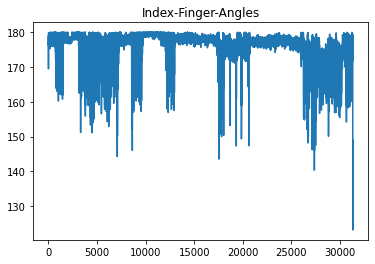

In [83]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(c))]
plt.plot(t1, c)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

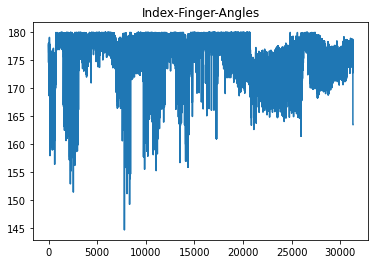

In [84]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(d))]
plt.plot(t1, d)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

In [85]:
t8=elapsed_time

In [86]:
t8

968

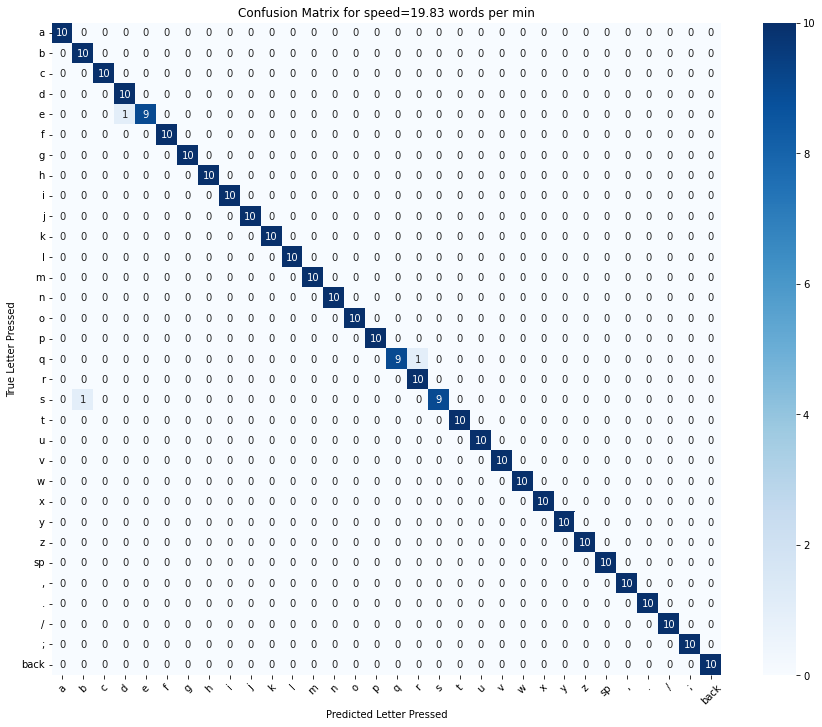

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example ground truth and predicted labels
y_true = expLetter8.copy()
y_pred = pred8.copy()

# Define class names
classes = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','sp',',','.','/',';','back']

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as a heatmap with class names
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix for speed=19.83 words per min')
plt.xlabel('Predicted Letter Pressed')
plt.ylabel('True Letter Pressed')

# Set class labels as tick labels
plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [88]:
# Calculate accuracy
accuracy = np.trace(cm) / np.sum(cm)

print("Accuracy:", accuracy)

Accuracy: 0.990625


#### Ultra fast typing:

In [206]:
expLetter9=['a','a','a','a','a','a','a','a','a','a','b','b','b','b','b','b','b','b','b','b','c','c','c','c','c','c','c','c','c','c','d','d','d','d','d','d','d','d','d','d','e','e','e','e','e','e','e','e','e','e','f','f','f','f','f','f','f','f','f','f','g','g','g','g','g','g','g','g','g','g','h','h','h','h','h','h','h','h','h','h','i','i','i','i','i','i','i','i','i','i','j','j','j','j','j','j','j','j','j','j','k','k','k','k','k','k','k','k','k','k','l','l','l','l','l','l','l','l','l','l','m','m','m','m','m','m','m','m','m','m','n','n','n','n','n','n','n','n','n','n','o','o','o','o','o','o','o','o','o','o','p','p','p','p','p','p','p','p','p','p','q','q','q','q','q','q','q','q','q','q','r','r','r','r','r','r','r','r','r','r','s','s','s','s','s','s','s','s','s','s','t','t','t','t','t','t','t','t','t','t','u','u','u','u','u','u','u','u','u','u','v','v','v','v','v','v','v','v','v','v','w','w','w','w','w','w','w','w','w','w','x','x','x','x','x','x','x','x','x','x','y','y','y','y','y','y','y','y','y','y','z','z','z','z','z','z','z','z','z','z',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',',',',',',',',',',',',',',',',',',',',','.','.','.','.','.','.','.','.','.','.','/','/','/','/','/','/','/','/','/','/',';',';',';',';',';',';',';',';',';',';','back','back','back','back','back','back','back','back','back','back']

In [207]:
len(expLetter9)

320

In [220]:
import time

a=[0]*30
b=[0]*30
c=[]
d=[]
pred9=[]

flag1=-1
flag2=-1
flag3=-1
flag4=-1
flag5=-1
flag6=-1
flag7=-1
flag8=-1
flag9=-1
flag10=-1
cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00,180.00]
lst2=[180.00,180.00,180.00,180.00,180.00]
start_time = time.time()
with mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.6,max_num_hands=2) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        #print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            # Get the number of detected hands
            num_hands = len(results.multi_hand_landmarks)
            
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                # Draw angles to image from joint list
                draw_finger_angles(image, results, joint_list,lst,lst2,a,b,c,d)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    mindex1=find_dis(coord1[0],coord1[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[0]<155.0:
                            flag1=0
                        if lst[0]>155.0 and flag1==0:
                            if ltr[mindex1]=="*":
                                stree=stree[0:-1]
                                pred9.append('back')
                                print('back')
                            else:
                                stree=stree+ltr[mindex1]
                                pred9.append(ltr[mindex1])
                                print(ltr[mindex1])
                            sleep(0.2)
                            flag1=-1
                    if num_hands==2:
                        if num==0:
                            if lst[0]<165.0:
                                flag1=0
                            if lst[0]>165.0 and flag1==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                    pred9.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex1]
                                    pred9.append(ltr[mindex1])
                                    print(ltr[mindex1])
                                sleep(0.2)
                                flag1=-1
                        if num==1:
                            if lst2[0]<170.0:
                                flag5=0
                            if lst2[0]>170.0 and flag5==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                    pred8.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex1]
                                    pred9.append(ltr[mindex1])
                                    print(ltr[mindex1])
                                sleep(0.2)
                                flag5=-1
                """"""                
                if get_label5b(num,hand,results):
                    text5,coord5=get_label_thumb(num,hand,results)
                    mindex5=find_dis(coord5[0],coord5[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[4]<160.0:
                            flag9=0
                        if lst[4]>160.0 and flag9==0:
                            if ltr[mindex5]=="*":
                                stree=stree[0:-1]
                                pred5.append('back')
                                print('back')
                            else:
                                stree=stree+ltr[mindex5]
                                pred5.append(ltr[mindex5])
                                print(ltr[mindex5])
                            sleep(0.99)
                            flag9=-1
                    if num_hands==2:
                        if num==0:
                            if lst[4]<160.0:
                                flag9=0
                            if lst[4]>160.0 and flag9==0:
                                if ltr[mindex5]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex5]
                                    pred5.append(ltr[mindex5])
                                    print(ltr[mindex5])
                                sleep(0.99)
                                flag9=-1
                        if num==1:
                            if lst2[4]<160.0:
                                flag10=0
                            if lst2[4]>160.0 and flag10==0:
                                if ltr[mindex5]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex5]
                                    pred5.append(ltr[mindex5])
                                    print(ltr[mindex5])
                                sleep(0.99)
                                flag10=-1
                """  
                """
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[1]<170.0:
                            flag1=0
                        if lst[1]>170.0 and flag2==0:
                            if ltr[mindex2]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex2]
                            sleep(0.99)
                            flag2=-1
                    if num_hands==2:
                        if num==0:
                            if lst[1]<170.0:
                                flag2=0
                            if lst[1]>170.0 and flag2==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag2=-1
                        if num==1:
                            if lst2[1]<170.0:
                                flag6=0
                            if lst2[1]>170.0 and flag6==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag6=-1
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[2]<170.0:
                            flag1=0
                        if lst[2]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[2]<170.0:
                                flag3=0
                            if lst[2]>170.0 and flag3==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag3=-1
                        if num==1:
                            if lst2[2]<170.0:
                                flag7=0
                            if lst2[2]>170.0 and flag7==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag7=-1
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[3]<170.0:
                            flag1=0
                        if lst[3]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[3]<170.0:
                                flag4=0
                            if lst[3]>170.0 and flag4==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag4=-1
                        if num==1:
                            if lst2[3]<170.0:
                                flag7=0
                            if lst2[3]>170.0 and flag8==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag8=-1
                """"""
        # Calculate the elapsed time
        elapsed_time = int(time.time() - start_time) 
        # Draw the timer text on the image
        timer_text = f"Timer: {elapsed_time} s"
        cv2.putText(image, timer_text, (image.shape[1] - 200, image.shape[0] - 20),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        if len(stree)>=10:
            stree=""
        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

a
a
a
a
a
a
a
q
a
a
a
b
b
b
b
b
b
b
b
b
c
c
c
c
c
c
c
c
c
d
d
d
d
d
d
d
d
d
d
d
e
e
e
e
e
e
e
e
e
e
f
f
f
f
f
f
f
f
f
f
f
g
g
g
g
g
g
g
g
g
h
h
h
h
h
h
h
h
h
h
i
i
i
i
i
i
i
i
j
i
k
j
j
j
j
j
j
j
j
j
k
k
k
k
k
k
k
k
l
k
o
l
l
l
l
l
l
l
l
l
m
m
m
m
m
m
m
m
m
m
n
n
n
n
n
n
n
n
n
n
o
o
o
o
o
o
o
p
p
o
p
p
p
p
p
p
p
p
p
p
q
q
q
q
q
q
q
q
q
q
r
r
r
r
r
r
r
r
r
r
s
s
s
s
s
s
s
s
s
s
t
t
t
t
t
t
t
t
t
t
i
u
u
u
u
u
u
u
u
u
v
v
v
v
v
v
v
v
v
v
w
w
w
w
w
w
w
w
w
w
x
x
x
x
x
x
x
x
x
x
x
y
y
y
y
y
y
y
u
y
z
z
z
z
z
z
z
z
z
z
z
 
 
 
 
 
 
 
 
 
,
,
,
,
,
,
,
,
,
,
/
.
.
.
.
.
.
.
.
.
;
/
;
/
/
/
/
/
/
/
/
/
;
;
;
;
;
;
;
;
back
back
back
back
back
back
back
back
back
back


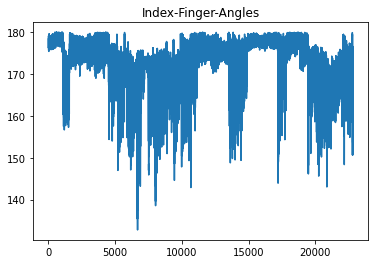

In [222]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(c))]
plt.plot(t1, c)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

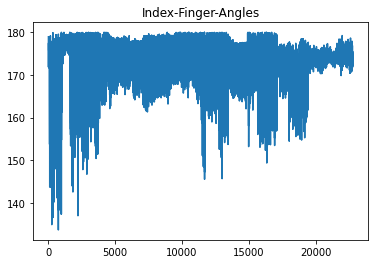

In [223]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(d))]
plt.plot(t1, d)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

In [224]:
t9=elapsed_time

In [225]:
t9

350

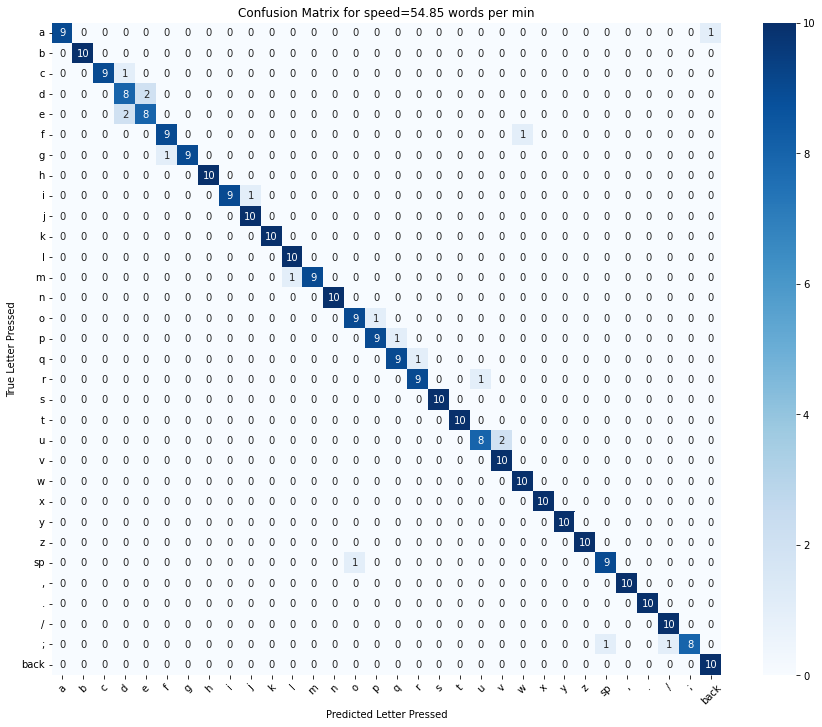

In [226]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example ground truth and predicted labels
y_true = expLetter9.copy()
y_pred = pred9.copy()

# Define class names
classes = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','sp',',','.','/',';','back']

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as a heatmap with class names
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix for speed=54.85 words per min')
plt.xlabel('Predicted Letter Pressed')
plt.ylabel('True Letter Pressed')

# Set class labels as tick labels
plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [227]:
# Calculate accuracy
accuracy = np.trace(cm) / np.sum(cm)

print("Accuracy:", accuracy)

Accuracy: 0.940625


#### Super fast typing:

In [184]:
expLetter10=['a','a','a','a','a','a','a','a','a','a','b','b','b','b','b','b','b','b','b','b','c','c','c','c','c','c','c','c','c','c','d','d','d','d','d','d','d','d','d','d','e','e','e','e','e','e','e','e','e','e','f','f','f','f','f','f','f','f','f','f','g','g','g','g','g','g','g','g','g','g','h','h','h','h','h','h','h','h','h','h','i','i','i','i','i','i','i','i','i','i','j','j','j','j','j','j','j','j','j','j','k','k','k','k','k','k','k','k','k','k','l','l','l','l','l','l','l','l','l','l','m','m','m','m','m','m','m','m','m','m','n','n','n','n','n','n','n','n','n','n','o','o','o','o','o','o','o','o','o','o','p','p','p','p','p','p','p','p','p','p','q','q','q','q','q','q','q','q','q','q','r','r','r','r','r','r','r','r','r','r','s','s','s','s','s','s','s','s','s','s','t','t','t','t','t','t','t','t','t','t','u','u','u','u','u','u','u','u','u','u','v','v','v','v','v','v','v','v','v','v','w','w','w','w','w','w','w','w','w','w','x','x','x','x','x','x','x','x','x','x','y','y','y','y','y','y','y','y','y','y','z','z','z','z','z','z','z','z','z','z',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',',',',',',',',',',',',',',',',',',',',','.','.','.','.','.','.','.','.','.','.','/','/','/','/','/','/','/','/','/','/',';',';',';',';',';',';',';',';',';',';','back','back','back','back','back','back','back','back','back','back']

In [185]:
len(expLetter10)

320

In [186]:
import time

a=[0]*30
b=[0]*30
c=[]
d=[]
pred10=[]

flag1=-1
flag2=-1
flag3=-1
flag4=-1
flag5=-1
flag6=-1
flag7=-1
flag8=-1
flag9=-1
flag10=-1
cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00,180.00]
lst2=[180.00,180.00,180.00,180.00,180.00]
start_time = time.time()
with mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.6,max_num_hands=2) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        #print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            # Get the number of detected hands
            num_hands = len(results.multi_hand_landmarks)
            
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                # Draw angles to image from joint list
                draw_finger_angles(image, results, joint_list,lst,lst2,a,b,c,d)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    mindex1=find_dis(coord1[0],coord1[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[0]<155.0:
                            flag1=0
                        if lst[0]>155.0 and flag1==0:
                            if ltr[mindex1]=="*":
                                stree=stree[0:-1]
                                pred10.append('back')
                                print('back')
                            else:
                                stree=stree+ltr[mindex1]
                                pred10.append(ltr[mindex1])
                                print(ltr[mindex1])
                            sleep(0.2)
                            flag1=-1
                    if num_hands==2:
                        if num==0:
                            if lst[0]<165.0:
                                flag1=0
                            if lst[0]>165.0 and flag1==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                    pred10.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex1]
                                    pred10.append(ltr[mindex1])
                                    print(ltr[mindex1])
                                sleep(0.2)
                                flag1=-1
                        if num==1:
                            if lst2[0]<170.0:
                                flag5=0
                            if lst2[0]>170.0 and flag5==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                    pred10.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex1]
                                    pred10.append(ltr[mindex1])
                                    print(ltr[mindex1])
                                sleep(0.2)
                                flag5=-1
                """"""                
                if get_label5b(num,hand,results):
                    text5,coord5=get_label_thumb(num,hand,results)
                    mindex5=find_dis(coord5[0],coord5[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[4]<160.0:
                            flag9=0
                        if lst[4]>160.0 and flag9==0:
                            if ltr[mindex5]=="*":
                                stree=stree[0:-1]
                                pred5.append('back')
                                print('back')
                            else:
                                stree=stree+ltr[mindex5]
                                pred5.append(ltr[mindex5])
                                print(ltr[mindex5])
                            sleep(0.99)
                            flag9=-1
                    if num_hands==2:
                        if num==0:
                            if lst[4]<160.0:
                                flag9=0
                            if lst[4]>160.0 and flag9==0:
                                if ltr[mindex5]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex5]
                                    pred5.append(ltr[mindex5])
                                    print(ltr[mindex5])
                                sleep(0.99)
                                flag9=-1
                        if num==1:
                            if lst2[4]<160.0:
                                flag10=0
                            if lst2[4]>160.0 and flag10==0:
                                if ltr[mindex5]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex5]
                                    pred5.append(ltr[mindex5])
                                    print(ltr[mindex5])
                                sleep(0.99)
                                flag10=-1
                """   
                """
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[1]<170.0:
                            flag1=0
                        if lst[1]>170.0 and flag2==0:
                            if ltr[mindex2]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex2]
                            sleep(0.99)
                            flag2=-1
                    if num_hands==2:
                        if num==0:
                            if lst[1]<170.0:
                                flag2=0
                            if lst[1]>170.0 and flag2==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag2=-1
                        if num==1:
                            if lst2[1]<170.0:
                                flag6=0
                            if lst2[1]>170.0 and flag6==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag6=-1
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[2]<170.0:
                            flag1=0
                        if lst[2]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[2]<170.0:
                                flag3=0
                            if lst[2]>170.0 and flag3==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag3=-1
                        if num==1:
                            if lst2[2]<170.0:
                                flag7=0
                            if lst2[2]>170.0 and flag7==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag7=-1
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[3]<170.0:
                            flag1=0
                        if lst[3]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[3]<170.0:
                                flag4=0
                            if lst[3]>170.0 and flag4==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag4=-1
                        if num==1:
                            if lst2[3]<170.0:
                                flag7=0
                            if lst2[3]>170.0 and flag8==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag8=-1
                """"""
        # Calculate the elapsed time
        elapsed_time = int(time.time() - start_time) 
        # Draw the timer text on the image
        timer_text = f"Timer: {elapsed_time} s"
        cv2.putText(image, timer_text, (image.shape[1] - 200, image.shape[0] - 20),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        if len(stree)>=10:
            stree=""
        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

a
a
a
a
a
a
a
a
a
a
b
b
b
b
b
b
b
b
b
b
c
c
c
c
c
c
c
c
c
c
d
d
d
d
d
d
d
d
d
d
e
e
e
e
e
e
e
e
e
e
f
f
f
f
f
f
f
f
f
f
g
t
g
g
g
g
g
g
g
g
g
y
h
h
h
y
h
h
y
h
i
i
i
o
o
i
i
i
o
o
j
j
j
j
j
j
j
j
j
j
k
k
k
k
k
k
k
k
k
k
l
l
l
l
l
l
l
l
l
l
m
m
m
m
m
m
m
m
m
m
n
n
n
n
n
n
n
n
n
n
o
o
o
o
o
o
o
o
o
o
p
p
p
p
p
p
p
p
p
p
q
q
q
q
q
q
q
q
q
q
r
r
r
r
r
r
r
r
r
r
s
s
s
s
s
s
s
s
s
s
t
t
t
t
t
t
t
t
t
t
u
u
u
u
u
u
u
u
u
u
v
v
v
v
v
v
v
v
v
v
w
w
w
w
q
w
w
w
w
w
w
x
x
x
x
x
x
x
x
x
x
y
y
y
y
y
y
y
y
y
z
z
z
z
z
z
z
z
z
z
z
 
 
 
 
 
 
 
 
 
 
,
,
,
,
,
,
,
,
,
,
.
.
.
.
.
.
.
.
.
.
/
/
;
/
/
/
/
/
/
;
;
;
;
;
;
;
;
;
;
back
back
back
back
back
back
back
back
back
back
back
back
back
back


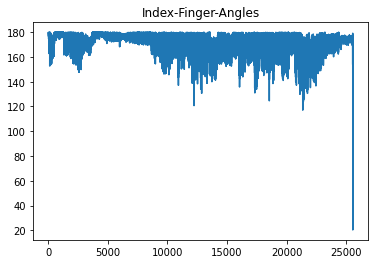

In [192]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(c))]
plt.plot(t1, c)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

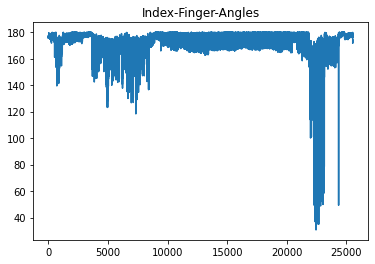

In [193]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(d))]
plt.plot(t1, d)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

In [194]:
t10=elapsed_time

In [195]:
t10

400

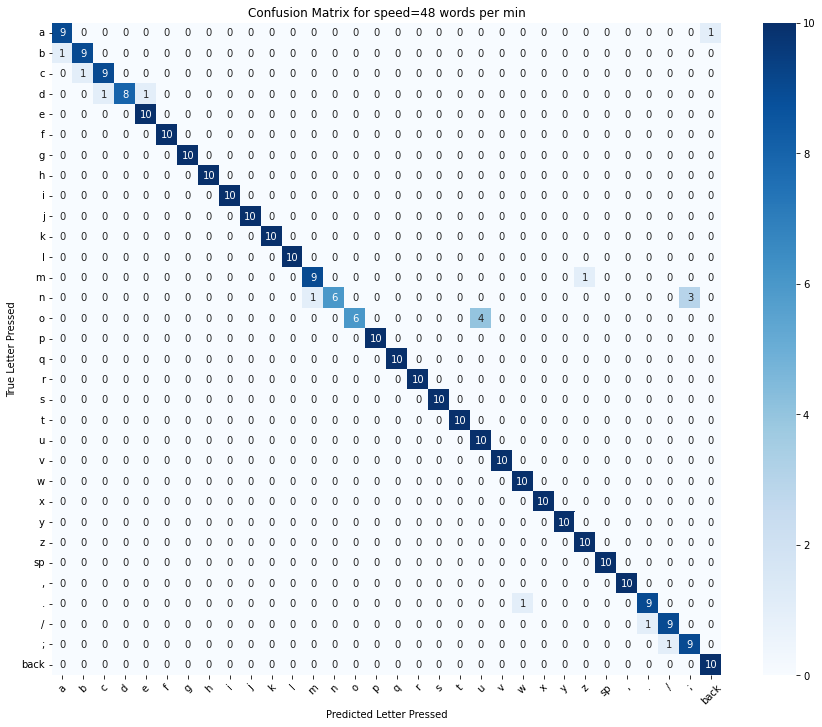

In [201]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example ground truth and predicted labels
y_true = expLetter10.copy()
y_pred = pred10.copy()

# Define class names
classes = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','sp',',','.','/',';','back']

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as a heatmap with class names
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix for speed=48 words per min')
plt.xlabel('Predicted Letter Pressed')
plt.ylabel('True Letter Pressed')

# Set class labels as tick labels
plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [202]:
# Calculate accuracy
accuracy = np.trace(cm) / np.sum(cm)

print("Accuracy:", accuracy)

Accuracy: 0.946875


#### Insane typing:

In [206]:
expLetter11=['a','a','a','a','a','a','a','a','a','a','b','b','b','b','b','b','b','b','b','b','c','c','c','c','c','c','c','c','c','c','d','d','d','d','d','d','d','d','d','d','e','e','e','e','e','e','e','e','e','e','f','f','f','f','f','f','f','f','f','f','g','g','g','g','g','g','g','g','g','g','h','h','h','h','h','h','h','h','h','h','i','i','i','i','i','i','i','i','i','i','j','j','j','j','j','j','j','j','j','j','k','k','k','k','k','k','k','k','k','k','l','l','l','l','l','l','l','l','l','l','m','m','m','m','m','m','m','m','m','m','n','n','n','n','n','n','n','n','n','n','o','o','o','o','o','o','o','o','o','o','p','p','p','p','p','p','p','p','p','p','q','q','q','q','q','q','q','q','q','q','r','r','r','r','r','r','r','r','r','r','s','s','s','s','s','s','s','s','s','s','t','t','t','t','t','t','t','t','t','t','u','u','u','u','u','u','u','u','u','u','v','v','v','v','v','v','v','v','v','v','w','w','w','w','w','w','w','w','w','w','x','x','x','x','x','x','x','x','x','x','y','y','y','y','y','y','y','y','y','y','z','z','z','z','z','z','z','z','z','z',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',',',',',',',',',',',',',',',',',',',',','.','.','.','.','.','.','.','.','.','.','/','/','/','/','/','/','/','/','/','/',';',';',';',';',';',';',';',';',';',';','back','back','back','back','back','back','back','back','back','back']

In [207]:
len(expLetter11)

320

In [220]:
import time

a=[0]*30
b=[0]*30
c=[]
d=[]
pred11=[]

flag1=-1
flag2=-1
flag3=-1
flag4=-1
flag5=-1
flag6=-1
flag7=-1
flag8=-1
flag9=-1
flag10=-1
cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00,180.00]
lst2=[180.00,180.00,180.00,180.00,180.00]
start_time = time.time()
with mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.6,max_num_hands=2) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        #print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            # Get the number of detected hands
            num_hands = len(results.multi_hand_landmarks)
            
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                # Draw angles to image from joint list
                draw_finger_angles(image, results, joint_list,lst,lst2,a,b,c,d)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    mindex1=find_dis(coord1[0],coord1[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[0]<155.0:
                            flag1=0
                        if lst[0]>155.0 and flag1==0:
                            if ltr[mindex1]=="*":
                                stree=stree[0:-1]
                                pred9.append('back')
                                print('back')
                            else:
                                stree=stree+ltr[mindex1]
                                pred9.append(ltr[mindex1])
                                print(ltr[mindex1])
                            sleep(0.2)
                            flag1=-1
                    if num_hands==2:
                        if num==0:
                            if lst[0]<165.0:
                                flag1=0
                            if lst[0]>165.0 and flag1==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                    pred9.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex1]
                                    pred9.append(ltr[mindex1])
                                    print(ltr[mindex1])
                                sleep(0.2)
                                flag1=-1
                        if num==1:
                            if lst2[0]<170.0:
                                flag5=0
                            if lst2[0]>170.0 and flag5==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                    pred8.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex1]
                                    pred9.append(ltr[mindex1])
                                    print(ltr[mindex1])
                                sleep(0.2)
                                flag5=-1
                """"""                
                if get_label5b(num,hand,results):
                    text5,coord5=get_label_thumb(num,hand,results)
                    mindex5=find_dis(coord5[0],coord5[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[4]<160.0:
                            flag9=0
                        if lst[4]>160.0 and flag9==0:
                            if ltr[mindex5]=="*":
                                stree=stree[0:-1]
                                pred5.append('back')
                                print('back')
                            else:
                                stree=stree+ltr[mindex5]
                                pred5.append(ltr[mindex5])
                                print(ltr[mindex5])
                            sleep(0.99)
                            flag9=-1
                    if num_hands==2:
                        if num==0:
                            if lst[4]<160.0:
                                flag9=0
                            if lst[4]>160.0 and flag9==0:
                                if ltr[mindex5]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex5]
                                    pred5.append(ltr[mindex5])
                                    print(ltr[mindex5])
                                sleep(0.99)
                                flag9=-1
                        if num==1:
                            if lst2[4]<160.0:
                                flag10=0
                            if lst2[4]>160.0 and flag10==0:
                                if ltr[mindex5]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex5]
                                    pred5.append(ltr[mindex5])
                                    print(ltr[mindex5])
                                sleep(0.99)
                                flag10=-1
                """  
                """
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[1]<170.0:
                            flag1=0
                        if lst[1]>170.0 and flag2==0:
                            if ltr[mindex2]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex2]
                            sleep(0.99)
                            flag2=-1
                    if num_hands==2:
                        if num==0:
                            if lst[1]<170.0:
                                flag2=0
                            if lst[1]>170.0 and flag2==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag2=-1
                        if num==1:
                            if lst2[1]<170.0:
                                flag6=0
                            if lst2[1]>170.0 and flag6==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag6=-1
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[2]<170.0:
                            flag1=0
                        if lst[2]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[2]<170.0:
                                flag3=0
                            if lst[2]>170.0 and flag3==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag3=-1
                        if num==1:
                            if lst2[2]<170.0:
                                flag7=0
                            if lst2[2]>170.0 and flag7==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag7=-1
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[3]<170.0:
                            flag1=0
                        if lst[3]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[3]<170.0:
                                flag4=0
                            if lst[3]>170.0 and flag4==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag4=-1
                        if num==1:
                            if lst2[3]<170.0:
                                flag7=0
                            if lst2[3]>170.0 and flag8==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag8=-1
                """"""
        # Calculate the elapsed time
        elapsed_time = int(time.time() - start_time) 
        # Draw the timer text on the image
        timer_text = f"Timer: {elapsed_time} s"
        cv2.putText(image, timer_text, (image.shape[1] - 200, image.shape[0] - 20),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        if len(stree)>=10:
            stree=""
        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

a
a
a
a
a
a
a
q
a
a
a
b
b
b
b
b
b
b
b
b
c
c
c
c
c
c
c
c
c
d
d
d
d
d
d
d
d
d
d
d
e
e
e
e
e
e
e
e
e
e
f
f
f
f
f
f
f
f
f
f
f
g
g
g
g
g
g
g
g
g
h
h
h
h
h
h
h
h
h
h
i
i
i
i
i
i
i
i
j
i
k
j
j
j
j
j
j
j
j
j
k
k
k
k
k
k
k
k
l
k
o
l
l
l
l
l
l
l
l
l
m
m
m
m
m
m
m
m
m
m
n
n
n
n
n
n
n
n
n
n
o
o
o
o
o
o
o
p
p
o
p
p
p
p
p
p
p
p
p
p
q
q
q
q
q
q
q
q
q
q
r
r
r
r
r
r
r
r
r
r
s
s
s
s
s
s
s
s
s
s
t
t
t
t
t
t
t
t
t
t
i
u
u
u
u
u
u
u
u
u
v
v
v
v
v
v
v
v
v
v
w
w
w
w
w
w
w
w
w
w
x
x
x
x
x
x
x
x
x
x
x
y
y
y
y
y
y
y
u
y
z
z
z
z
z
z
z
z
z
z
z
 
 
 
 
 
 
 
 
 
,
,
,
,
,
,
,
,
,
,
/
.
.
.
.
.
.
.
.
.
;
/
;
/
/
/
/
/
/
/
/
/
;
;
;
;
;
;
;
;
back
back
back
back
back
back
back
back
back
back


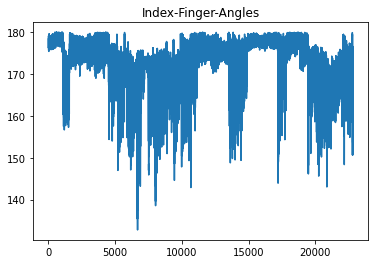

In [222]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(c))]
plt.plot(t1, c)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

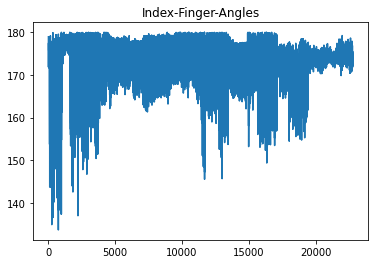

In [223]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(d))]
plt.plot(t1, d)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

In [224]:
t11=elapsed_time

In [225]:
t11

350

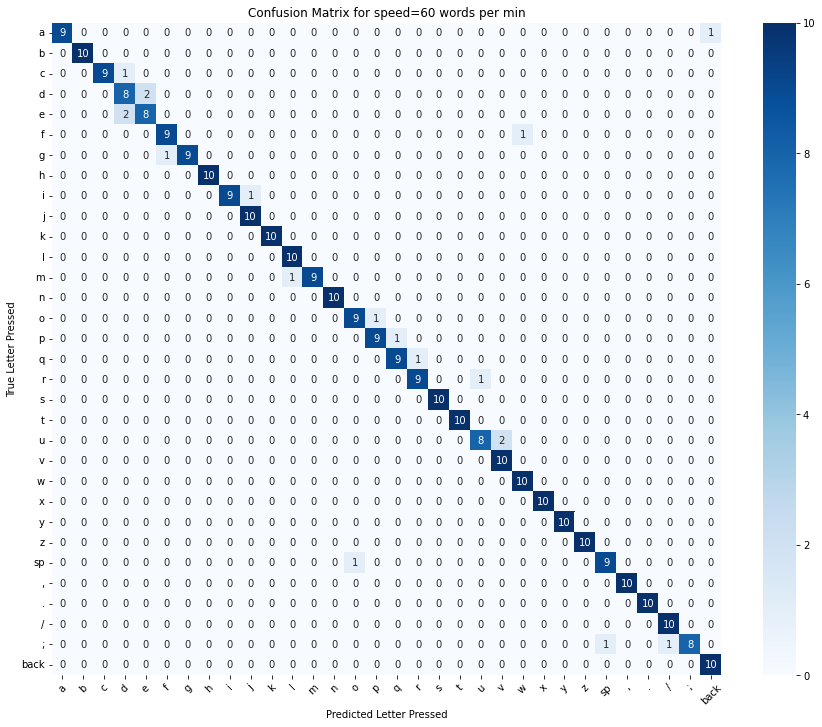

In [239]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example ground truth and predicted labels
y_true = expLetter11.copy()
y_pred = pred11.copy()

# Define class names
classes = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','sp',',','.','/',';','back']

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as a heatmap with class names
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion Matrix for speed=60 words per min')
plt.xlabel('Predicted Letter Pressed')
plt.ylabel('True Letter Pressed')

# Set class labels as tick labels
plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [240]:
# Calculate accuracy
accuracy = np.trace(cm) / np.sum(cm)

print("Accuracy:", accuracy)

Accuracy: 0.940625


# ...................................RUN FROM HERE................................................

In [234]:
t1=1551
t2=833
t3=732
t4=564
t5=423
t6=490
t7=676
t8=968
t9=350
t10=400
t11=350
expLetter=['a','a','a','a','a','a','a','a','a','a','b','b','b','b','b','b','b','b','b','b','c','c','c','c','c','c','c','c','c','c','d','d','d','d','d','d','d','d','d','d','e','e','e','e','e','e','e','e','e','e','f','f','f','f','f','f','f','f','f','f','g','g','g','g','g','g','g','g','g','g','h','h','h','h','h','h','h','h','h','h','i','i','i','i','i','i','i','i','i','i','j','j','j','j','j','j','j','j','j','j','k','k','k','k','k','k','k','k','k','k','l','l','l','l','l','l','l','l','l','l','m','m','m','m','m','m','m','m','m','m','n','n','n','n','n','n','n','n','n','n','o','o','o','o','o','o','o','o','o','o','p','p','p','p','p','p','p','p','p','p','q','q','q','q','q','q','q','q','q','q','r','r','r','r','r','r','r','r','r','r','s','s','s','s','s','s','s','s','s','s','t','t','t','t','t','t','t','t','t','t','u','u','u','u','u','u','u','u','u','u','v','v','v','v','v','v','v','v','v','v','w','w','w','w','w','w','w','w','w','w','x','x','x','x','x','x','x','x','x','x','y','y','y','y','y','y','y','y','y','y','z','z','z','z','z','z','z','z','z','z',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',',',',',',',',',',',',',',',',',',',',','.','.','.','.','.','.','.','.','.','.','/','/','/','/','/','/','/','/','/','/',';',';',';',';',';',';',';',';',';',';','back','back','back','back','back','back','back','back','back','back']

pred1=['a','a','a','a','a','a','a','a','a','a','b','b','b','b','b','b','b','b','b','b','c','c','c','c','c','c','c','c','c','c','d','d','d','d','d','d','d','d','d','d','e','e','e','e','e','e','e','e','e','e','f','f','f','f','f','f','f','f','f','f','g','g','g','g','g','g','g','g','g','g','h','h','h','h','h','h','h','h','h','h','i','i','i','i','i','i','i','i','i','i','j','j','j','j','j','j','j','j','j','j','k','k','k','k','k','k','k','k','k','k','l','o','l','l','l','l','l','l','l','l','m','m','m','m','m','m','m','m','m','m','n','n','n','n','n','n','n','n','n','n','o','o','o','o','o','o','o','o','o','o','p','p','p','p','p','p','p','p','p','p','q','q','q','q','q','q','q','q','q','q','r','r','r','r','r','r','r','r','r','r','s','s','s','s','s','s','s','s','s','s','t','t','t','t','t','t','t','t','t','t','u','u','u','u','u','u','u','u','u','u','v','v','v','v','v','v','v','v','v','v','w','w','w','w','w','w','w','w','w','w','x','x','x','x','x','x','x','x','x','x','y','y','y','y','y','y','y','y','y','y','z','z','z','z','z','z','z','z','z','z',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',',',',',',',',',',',',',',',',',',',',','.','.','.','.','.','.','.','.','.','.',';',';','/','/','/','/','/','/','/','/',';',';',';',';',';',';',';',';',';',';','back','back','back','back','back','back','back','back','back','back']
pred2=['a','a','a','a','a','a','a','a','a','a','b','b','b','b','b','b','b','b','b','b','c','c','c','c','c','c','c','c','c','c','d','d','d','d','d','d','d','d','d','d','e','e','e','e','e','e','e','e','e','e','f','f','f','f','f','f','f','f','f','f','g','g','g','g','g','g','g','g','g','g','h','h','h','h','h','h','h','h','h','h','i','i','i','i','i','i','i','i','i','i','i','j','j','j','j','j','j','j','j','j','j','k','k','k','k','k','k','k','k','k','l','l','l','l','l','l','l','l','l','l','m','m','m','m','m','m','m','m','m','m','n','n','n','n','n','n','n','n','n','n','o','o','o','o','o','o','o','o','o','o','p','p','p','p','p','p','p','p','p','p','q','q','q','q','q','q','q','q','q','q','r','r','r','r','r','r','r','r','r','r','s','s','s','s','s','s','s','s','s','s','t','t','t','t','t','t','t','t','t','t','u','u','u','u','u','u','u','u','u','u','v','v','v','v','v','v','v','v','v','v','w','w','w','w','w','w','w','w','w','w','x','x','x','x','x','x','x','x','x','x','y','y','y','y','y','y','y','y','y','y','z','z','z','z','z','z','z','z','z','z',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',',',',',',',',',',',',',',',',',',',',','.','.','.','.','.','/','.','.','.','.','/','/','/','/','/','/','/','/','/','/','/',';',';',';',';',';',';',';',';',';','back','back','back','back','back','back','back','back','back','back']
pred3=['a','a','a','a','a','a','a','a','a','a','b','b','b','b','b','b','b','b','b','b','c','c','c','c','c','c','c','c','c','c','d','d','d','d','d','d','d','d','d','d','e','e','e','e','e','e','e','e','e','e','f','f','f','f','f','f','f','f','f','f','g','g','g','g','g','g','g','g','g','g','g','h','h','h','h','h','h','h','h','h','i','i','i','i','i','i','i','i','i','i','j','j','j','j','j','j','j','j','j','j','k','k','k','k','k','k','k','k','k','k','l','l','l','l','l','l','l','l','l','l','m','m','m','m','m','m','m','m','m','m','n','n','n','n','n','n','n','n','n','n','o','o','o','o','o','o','p','p','o','o','p','p','p','p','p','p','p','p','p','p','q','q','q','q','q','q','q','q','q','q','r','r','r','r','r','r','r','r','r','r','s','s','s','s','w','s','s','s','s','s','t','t','t','t','t','y','t','t','t','t','u','u','u','u','u','u','u','u','u','u','v','v','v','v','v','v','v','v','v','v','w','w','w','w','w','w','w','w','w','w','x','x','x','x','x','x','x','s','x','x','y','y','y','y','u','y','y','y','y','y','z','z','z','z','z','z','z','z','z','z',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',',',',',',',',',',',',',',',',',',','.','.','l','.','.','.','.','.','.','.','.','/','/','/','/','/','/','/','/','/','/',';',';',';',';',';',';',';',';',';',';','back','back','back','back','back','back','back','back','back','back']
pred4=['a','a','a','a','a','a','a','a','a','a','b','b','b','b','b','b','b','b','b','b','c','c','c','c','c','c','c','c','c','c','d','d','d','d','d','d','d','d','d','d','e','e','e','e','e','e','e','e','e','e','f','f','f','f','f','f','f','f','f','f','y','g','g','g','g','g','g','g','g','g','h','y','h','h','h','h','h','h','h','h','i','i','i','i','i','i','i','i','i','i','u','j','j','j','j','j','j','j','j','j','k','k','k','k','k','k','k','k','k','k','l','l','o','l','l','l','l','l','l','l','m','m','m','m','m','m','m','m','m','m','n','n','n','n','n','n','n','n','n','n','p','p','o','o','o','o','o','o','o','o','p','p','p','p','p','p','p','p','p','p','q','q','q','q','q','q','q','q','q','q','r','r','r','r','r','r','r','r','r','r','s','s','s','s','s','s','s','s','s','s','t','t','t','t','t','t','t','t','t','t','u','i','i','u','u','u','u','u','u','u','v','v','v','v','v','v','v','v','v','v','w','w','w','w','w','w','w','w','w','w','x','x','x','x','x','x','x','x','s','x','y','y','y','y','y','y','y','y','y','y','z','z','z','z','z','z','z','z','z','z',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',',',',',',',',',',',',',',',',',',',',','.','.','.','.','.','.','.','.','.','.',';','/','/','/','/','/','/','/','/','/','/',';',';',';',';',';',';',';',';',';','back','back','back','back','back','back','back','back','back','back']
pred5=['a','a','a','a','a','a','a','a','a','a','b','b','b','b','b','b','b','b','b','b','c','c','c','c','c','c','c','c','c','c','d','d','d','d','d','d','d','d','d','d','e','e','e','e','e','e','e','e','e','e','f','f','f','f','f','f','f','f','f','f','g','g','g','t','g','g','g','g','g','g','h','h','h','h','h','h','h','h','h','h','i','i','i','i','i','i','i','i','i','i','k','j','j','j','j','j','j','j','j','j','k','k','k','k','k','k','k','k','k','k','k','l','l','l','l','l','l','l','l','l','m','m','m','m','m','m','m','m','m','m','n','n','n','n','n','n','n','n','n','n','o','o','o','o','p','o','o','o','o','o','p','p','p','p','p','p','p','p','p','p','q','q','q','q','q','q','q','q','q','q','r','r','r','r','r','r','r','r','r','r','s','s','s','s','s','s','s','s','s','s','t','t','t','t','t','t','t','t','t','t','u','u','u','u','i','u','u','u','u','u','v','v','v','v','v','v','v','v','v','v','w','w','w','w','w','w','w','w','w','w','x','x','x','x','x','x','x','x','x','x','y','y','y','y','y','y','y','y','y','y','z','z','z','z','z','z','z','z','z','z',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',',',',',',',',',',',',',',',',',',','.','.','.','/','/','.','.','.','.','.','/','/','/','/','/','/','/','/','/','/',';',';',';',';',';',';',';',';',';',';','back','back','back','back','back','back','back','back','back','back']
pred6=['a','a','a','a','a','a','a','a','a','a','b','b','b','b','b','b','b','b','b','b','c','c','c','c','c','c','c','c','c','c','d','d','d','d','d','d','d','d','d','d','e','e','e','e','e','e','e','e','e','e','f','f','f','f','f','f','f','f','f','f','g','g','g','g','g','g','g','g','g','g','h','h','h','h','h','h','h','h','h','h','i','i','i','o','i','i','i','i','i','i','j','j','j','j','j','j','j','j','j','j','k','k','k','k','k','k','k','k','k','k','l','l','l','l','l','l','l','l','l','l','l','m','m','m','m','m','m','m','m','m','n','n','n','n','n','n','n','n','n','n','o','o','o','o','o','o','o','o','o','o','o','p','p','p','p','p','p','p','p','p','q','q','q','q','q','q','q','q','q','q','r','r','r','r','r','r','r','r','r','r','s','s','s','s','s','s','s','s','s','s','t','t','t','t','t','t','t','t','t','t','u','u','u','u','u','u','u','u','u','u','v','v','v','v','v','v','v','v','v','v','w','w','w','w','w','w','w','w','w','w','x','x','x','x','x','x','x','x','x','x','y','y','y','y','y','y','y','y','y','y','z','z','z','z','z','z','z','z','z','z','z',' ',' ',' ',' ',' ',' ',' ',' ',' ',',',',',',',',',',',',',',',',',',',',','.','.','.','.','.','.','/','.','.','.','/','/','/','/','/','/','/','/','/','/',';',';',';',';',';',';',';',';',';',';','back','back','back','back','back','back','back','back','back',' ']
pred7=['a','a','a','a','a','a','a','a','a','a','b','b','b','b','b','b','b','b','b','b','c','c','c','c','c','c','c','c','c','c','d','d','d','d','d','d','d','d','d','d','e','e','e','e','e','e','e','e','e','e','f','f','f','f','f','f','f','f','f','f','f','g','g','g','g','g','g','g','g','g','h','h','h','h','h','h','h','h','h','h','i','i','i','i','i','i','i','i','i','i','j','k','j','k','j','j','j','j','j','j','k','l','k','k','k','k','k','k','k','k','l','l','l','l','p','l','p','p','l','l','m','m','m','m','m','m','m','m','m','m','n','n','n','n','n','n','n','n','n','n','o','o','o','o','o','o','o','o','o','o','p','p','p','p','p','p','p','p','p','p','q','q','q','q','q','q','q','q','q','q','r','r','r','r','r','r','r','r','r','r','s','s','s','s','s','s','s','s','s','s','t','t','t','t','t','t','t','t','t','t','u','u','i','u','u','u','u','u','u','u','v','v','v','v','v','v','v','v','v','v','w','w','w','w','w','w','w','w','w','w','x','x','x','x','x','x','x','x','x','x','y','y','y','y','y','y','y','y','u','y','z','z','z','z','z','z','z','z','z','z',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',',',',',',',',',',',',',',',',',',',',','.','.','l','.','.','.','.','.','.','.','/','/','/','/','/','/','/','/','/','/',';',';',';',';',';',';',';',';',';',';','back','back','back','back','back','back','back','back','/','back']
pred8=['a','a','a','a','a','a','a','a','a','a','b','b','b','b','b','b','b','b','b','b','c','c','c','c','c','c','c','c','c','c','d','d','d','d','d','d','d','d','d','d','e','e','e','e','e','e','e','e','e','e','f','f','f','f','f','f','f','f','f','f','g','g','g','g','g','g','g','g','g','g','h','h','h','h','h','h','h','h','h','h','i','i','i','i','i','i','i','i','i','i','j','j','j','j','j','j','j','j','j','j','l','k','k','k','k','k','k','k','k','k','l','l','l','l','l','l','l','l','l','l',',','m','m','m','m','m','m','m','m','m','n','n','n','n','n','n','n','n','n','n','o','o','o','o','o','o','o','o','o','o','p','p','p','p','p','p','p','p','p','p','q','q','q','q','q','q','q','q','q','q','r','r','r','r','r','r','r','r','r','r','s','s','s','s','s','s','s','s','s','s','t','t','t','t','t','t','t','t','t','t','u','u','u','u','u','u','u','u','u','u','v','v','v','v','v','v','v','v','v','v','w','w','w','w','w','w','w','w','w','w','x','x','x','x','x','x','x','x','x','x','y','y','y','y','y','y','y','y','y','y','z','z','z','z','z','z','z','z','z','z',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',',',',',',',',',',',',',',',',',',',',','.','.','.','.','.','.','.','.','.','.','/','/','/','/','/','/','/','/','/','/','/',';',';',';',';',';',';',';',';',';','back','back','back','back','back','back','back','back','back','back']
pred9=['a','a','a','a','a','a','a','q','a','a','a','b','b','b','b','b','b','b','b','b','c','c','c','c','c','c','c','c','c','d','d','d','d','d','d','d','d','d','d','d','e','e','e','e','e','e','e','e','e','e','f','f','f','f','f','f','f','f','f','f','f','g','g','g','g','g','g','g','g','g','h','h','h','h','h','h','h','h','h','h','i','i','i','i','i','i','i','i','j','i','k','j','j','j','j','j','j','j','j','j','k','k','k','k','k','k','k','k','l','k','o','l','l','l','l','l','l','l','l','l','m','m','m','m','m','m','m','m','m','m','n','n','n','n','n','n','n','n','n','n','o','o','o','o','o','o','o','p','p','o','p','p','p','p','p','p','p','p','p','p','q','q','q','q','q','q','q','q','q','q','r','r','r','r','r','r','r','r','r','r','s','s','s','s','s','s','s','s','s','s','t','t','t','t','t','t','t','t','t','t','i','u','u','u','u','u','u','u','u','u','v','v','v','v','v','v','v','v','v','v','w','w','w','w','w','w','w','w','w','w','x','x','x','x','x','x','x','x','x','x','x','y','y','y','y','y','y','y','u','y','z','z','z','z','z','z','z','z','z','z','z',' ',' ',' ',' ',' ',' ',' ',' ',' ',',',',',',',',',',',',',',',',',',',',','/','.','.','.','.','.','.','.','.','.',';','/',';','/','/','/','/','/','/','/','/','/',';',';',';',';',';',';',';',';','back','back','back','back','back','back','back','back','back','back']
pred10=['a','a','a','a','a','a','a','a','a','a','b','b','b','b','b','b','b','b','b','b','c','c','c','c','c','c','c','c','c','c','d','d','d','d','d','d','d','d','d','d','e','e','e','e','e','e','e','e','e','e','f','f','f','f','f','f','f','f','f','f','g','t','g','g','g','g','g','g','g','g','g','y','h','h','h','y','h','h','y','h','i','i','i','o','o','i','i','i','o','o','j','j','j','j','j','j','j','j','j','j','k','k','k','k','k','k','k','k','k','k','l','l','l','l','l','l','l','l','l','l','m','m','m','m','m','m','m','m','m','m','n','n','n','n','n','n','n','n','n','n','o','o','o','o','o','o','o','o','o','o','p','p','p','p','p','p','p','p','p','p','q','q','q','q','q','q','q','q','q','q','r','r','r','r','r','r','r','r','r','r','s','s','s','s','s','s','s','s','s','s','t','t','t','t','t','t','t','t','t','t','u','u','u','u','u','u','u','u','u','u','v','v','v','v','v','v','v','v','v','v','w','w','w','w','q','w','w','w','w','w','w','x','x','x','x','x','x','x','x','x','x','y','y','y','y','y','y','y','y','y','z','z','z','z','z','z','z','z','z','z','z',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',',',',',',',',',',',',',',',',',',',',','.','.','.','.','.','.','.','.','.','.','/','/',';','/','/','/','/','/','/',';',';',';',';',';',';',';',';',';',';','back','back','back','back','back','back','back','back','back','back']
pred11=['a','a','a','a','a','a','a','q','a','a','a','b','b','b','b','b','b','b','b','b','c','c','c','c','c','c','c','c','c','d','d','d','d','d','d','d','d','d','d','d','e','e','e','e','e','e','e','e','e','e','f','f','f','f','f','f','f','f','f','f','f','g','g','g','g','g','g','g','g','g','h','h','h','h','h','h','h','h','h','h','i','i','i','i','i','i','i','i','j','i','k','j','j','j','j','j','j','j','j','j','k','k','k','k','k','k','k','k','l','k','o','l','l','l','l','l','l','l','l','l','m','m','m','m','m','m','m','m','m','m','n','n','n','n','n','n','n','n','n','n','o','o','o','o','o','o','o','p','p','o','p','p','p','p','p','p','p','p','p','p','q','q','q','q','q','q','q','q','q','q','r','r','r','r','r','r','r','r','r','r','s','s','s','s','s','s','s','s','s','s','t','t','t','t','t','t','t','t','t','t','i','u','u','u','u','u','u','u','u','u','v','v','v','v','v','v','v','v','v','v','w','w','w','w','w','w','w','w','w','w','x','x','x','x','x','x','x','x','x','x','x','y','y','y','y','y','y','y','u','y','z','z','z','z','z','z','z','z','z','z','z',' ',' ',' ',' ',' ',' ',' ',' ',' ',',',',',',',',',',',',',',',',',',',',','/','.','.','.','.','.','.','.','.','.',';','/',';','/','/','/','/','/','/','/','/','/',';',';',';',';',';',';',';',';','back','back','back','back','back','back','back','back','back','back']

## Different speeds comparisons:

In [235]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

accuracyArr=[]
y_true=expLetter.copy()
# Example ground truth and predicted labels

y_pred = pred1.copy()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate accuracy
accuracy = np.trace(cm) / np.sum(cm)
accuracyArr.append(accuracy)

# Example ground truth and predicted labels

y_pred = pred8.copy()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate accuracy
accuracy = np.trace(cm) / np.sum(cm)
accuracyArr.append(accuracy)

# Example ground truth and predicted labels

y_pred = pred2.copy()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate accuracy
accuracy = np.trace(cm) / np.sum(cm)
accuracyArr.append(accuracy)

# Example ground truth and predicted labels

y_pred = pred3.copy()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate accuracy
accuracy = np.trace(cm) / np.sum(cm)
accuracyArr.append(accuracy)

# Example ground truth and predicted labels

y_pred = pred7.copy()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate accuracy
accuracy = np.trace(cm) / np.sum(cm)
accuracyArr.append(accuracy)

y_pred = pred4.copy()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate accuracy
accuracy = np.trace(cm) / np.sum(cm)
accuracyArr.append(accuracy)

# Example ground truth and predicted labels

y_pred = pred6.copy()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate accuracy
accuracy = np.trace(cm) / np.sum(cm)
accuracyArr.append(accuracy)


# Example ground truth and predicted labels

y_pred = pred5.copy()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate accuracy
accuracy = np.trace(cm) / np.sum(cm)
accuracyArr.append(accuracy)

# Example ground truth and predicted labels

y_pred = pred10.copy()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate accuracy
accuracy = np.trace(cm) / np.sum(cm)
accuracyArr.append(accuracy)

# Example ground truth and predicted labels

y_pred = pred9.copy()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate accuracy
accuracy = np.trace(cm) / np.sum(cm)
accuracyArr.append(accuracy)

# Example ground truth and predicted labels

y_pred = pred11.copy()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate accuracy
accuracy = np.trace(cm) / np.sum(cm)
accuracyArr.append(accuracy)

print(accuracyArr)

[0.990625, 0.990625, 0.9875, 0.971875, 0.965625, 0.965625, 0.98125, 0.975, 0.946875, 0.940625, 0.940625]


In [236]:
for i in range(11):
    accuracyArr[i]*=100

In [237]:
accuracyArr

[99.0625,
 99.0625,
 98.75,
 97.1875,
 96.5625,
 96.5625,
 98.125,
 97.5,
 94.6875,
 94.0625,
 94.0625]

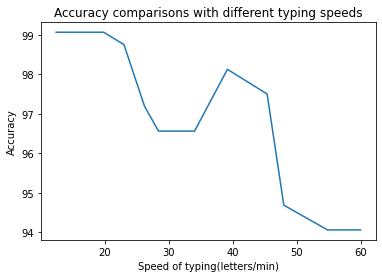

In [238]:
import matplotlib.pyplot as plt

# Sample data
x = [12.39,19.83,22.99,26.22,28.40,34.04,39.18,45.39,48,54.85,60]  # X-axis values
y = accuracyArr.copy()  # Y-axis values

# Plotting the line graph
plt.plot(x, y)

# Adding labels and title
plt.xlabel('Speed of typing(letters/min)')
plt.ylabel('Accuracy')
plt.title('Accuracy comparisons with different typing speeds')

# Displaying the graph
plt.show()


# TESTING ON DIFFERENT PEOPLE FOR TOUCH ACCURACY:(RUN HERE)

#### YOU HAVE 43 TOUCHES THAT EQUALS NUMBER OF CHARACTERS IN THIS STRING. YOU HAVE TO TYPE THIS: "THE QUICK BROWN FOX JUMPS OVER THE LAZY DOG"

In [117]:
def calculate_accuracy(true_output, predicted_output):
    total_elements = len(true_output)
    matching_elements = sum(1 for true, pred in zip(true_output, predicted_output) if true == pred)
    accuracy = matching_elements / total_elements
    return accuracy2

PERSON 1:

In [124]:
tempo=['t','h','e',' ','q','u','i','c','k',' ','b','r','o','w','n',' ','f','o','x',' ','j','u','m','p','s',' ','o','v','e','r',' ','t','h','e',' ','l','a','z','y',' ','d','o','g']

In [145]:
import time

a=[0]*30
b=[0]*30
c=[]
d=[]
pred5=[]

flag1=-1
flag2=-1
flag3=-1
flag4=-1
flag5=-1
flag6=-1
flag7=-1
flag8=-1
flag9=-1
flag10=-1
cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00,180.00]
lst2=[180.00,180.00,180.00,180.00,180.00]
start_time = time.time()
with mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.6,max_num_hands=2) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        #print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            # Get the number of detected hands
            num_hands = len(results.multi_hand_landmarks)
            
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                # Draw angles to image from joint list
                draw_finger_angles(image, results, joint_list,lst,lst2,a,b,c,d)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    mindex1=find_dis(coord1[0],coord1[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[0]<155.0:
                            flag1=0
                        if lst[0]>155.0 and flag1==0:
                            if ltr[mindex1]=="*":
                                stree=stree[0:-1]
                                pred5.append('back')
                                print('back')
                            else:
                                stree=stree+ltr[mindex1]
                                pred5.append(ltr[mindex1])
                                print(ltr[mindex1])
                            sleep(0.5)
                            flag1=-1
                    if num_hands==2:
                        if num==0:
                            if lst[0]<165.0:
                                flag1=0
                            if lst[0]>165.0 and flag1==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex1]
                                    pred5.append(ltr[mindex1])
                                    print(ltr[mindex1])
                                sleep(0.5)
                                flag1=-1
                        if num==1:
                            if lst2[0]<170.0:
                                flag5=0
                            if lst2[0]>170.0 and flag5==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex1]
                                    pred5.append(ltr[mindex1])
                                    print(ltr[mindex1])
                                sleep(0.5)
                                flag5=-1
                                
                if get_label5b(num,hand,results):
                    text5,coord5=get_label_thumb(num,hand,results)
                    mindex5=find_dis(coord5[0],coord5[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[4]<160.0:
                            flag9=0
                        if lst[4]>160.0 and flag9==0:
                            if ltr[mindex5]=="*":
                                stree=stree[0:-1]
                                pred5.append('back')
                                print('back')
                            else:
                                stree=stree+ltr[mindex5]
                                pred5.append(ltr[mindex5])
                                print(ltr[mindex5])
                            sleep(0.5)
                            flag9=-1
                    if num_hands==2:
                        if num==0:
                            if lst[4]<160.0:
                                flag9=0
                            if lst[4]>160.0 and flag9==0:
                                if ltr[mindex5]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex5]
                                    pred5.append(ltr[mindex5])
                                    print(ltr[mindex5])
                                sleep(0.5)
                                flag9=-1
                        if num==1:
                            if lst2[4]<160.0:
                                flag10=0
                            if lst2[4]>160.0 and flag10==0:
                                if ltr[mindex5]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex5]
                                    pred5.append(ltr[mindex5])
                                    print(ltr[mindex5])
                                sleep(0.5)
                                flag10=-1   
                """"""
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[1]<170.0:
                            flag1=0
                        if lst[1]>170.0 and flag2==0:
                            if ltr[mindex2]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex2]
                            sleep(0.99)
                            flag2=-1
                    if num_hands==2:
                        if num==0:
                            if lst[1]<170.0:
                                flag2=0
                            if lst[1]>170.0 and flag2==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag2=-1
                        if num==1:
                            if lst2[1]<170.0:
                                flag6=0
                            if lst2[1]>170.0 and flag6==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag6=-1
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[2]<170.0:
                            flag1=0
                        if lst[2]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[2]<170.0:
                                flag3=0
                            if lst[2]>170.0 and flag3==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag3=-1
                        if num==1:
                            if lst2[2]<170.0:
                                flag7=0
                            if lst2[2]>170.0 and flag7==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag7=-1
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[3]<170.0:
                            flag1=0
                        if lst[3]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[3]<170.0:
                                flag4=0
                            if lst[3]>170.0 and flag4==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag4=-1
                        if num==1:
                            if lst2[3]<170.0:
                                flag7=0
                            if lst2[3]>170.0 and flag8==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag8=-1
                """"""
        # Calculate the elapsed time
        elapsed_time = int(time.time() - start_time) 
        # Draw the timer text on the image
        timer_text = f"Timer: {elapsed_time} s"
        #cv2.putText(image, timer_text, (image.shape[1] - 200, image.shape[0] - 20),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

t
h
e
 
q
u
i
c
k
 
b
r
o
w
n
 
f
o
x
 
j
u
m
p
s
 
o
v
e
r
 
t
h
e
 
l
a
z
y
 
d
o
g


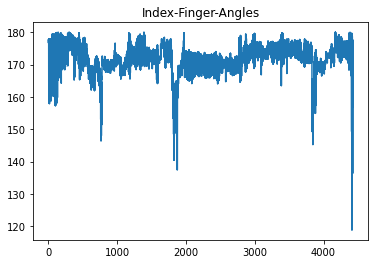

In [146]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(c))]
plt.plot(t1, c)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

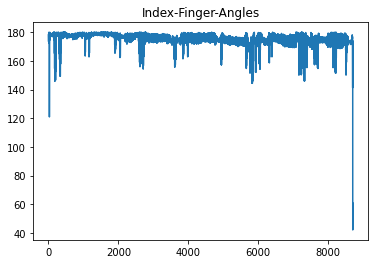

In [168]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(d))]
plt.plot(t1, d)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

In [148]:
yPred = [char for char in stree]
yTrue = ['t','h','e',' ','q','u','i','c','k',' ','b','r','o','w','n',' ','f','o','x',' ','j','u','m','p','s',' ','o','v','e','r',' ','t','h','e',' ','l','a','z','y',' ','d','o','g']

In [161]:
calculate_accuracy(yPred,yTrue)

1.0

PERSON 2:

In [155]:
import time

a=[0]*30
b=[0]*30
c=[]
d=[]
pred5=[]

flag1=-1
flag2=-1
flag3=-1
flag4=-1
flag5=-1
flag6=-1
flag7=-1
flag8=-1
flag9=-1
flag10=-1
cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00,180.00]
lst2=[180.00,180.00,180.00,180.00,180.00]
start_time = time.time()
with mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.6,max_num_hands=2) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        #print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            # Get the number of detected hands
            num_hands = len(results.multi_hand_landmarks)
            
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                # Draw angles to image from joint list
                draw_finger_angles(image, results, joint_list,lst,lst2,a,b,c,d)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    mindex1=find_dis(coord1[0],coord1[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[0]<155.0:
                            flag1=0
                        if lst[0]>155.0 and flag1==0:
                            if ltr[mindex1]=="*":
                                stree=stree[0:-1]
                                pred5.append('back')
                                print('back')
                            else:
                                stree=stree+ltr[mindex1]
                                pred5.append(ltr[mindex1])
                                print(ltr[mindex1])
                            sleep(0.5)
                            flag1=-1
                    if num_hands==2:
                        if num==0:
                            if lst[0]<165.0:
                                flag1=0
                            if lst[0]>165.0 and flag1==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex1]
                                    pred5.append(ltr[mindex1])
                                    print(ltr[mindex1])
                                sleep(0.5)
                                flag1=-1
                        if num==1:
                            if lst2[0]<170.0:
                                flag5=0
                            if lst2[0]>170.0 and flag5==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex1]
                                    pred5.append(ltr[mindex1])
                                    print(ltr[mindex1])
                                sleep(0.5)
                                flag5=-1
                                
                if get_label5b(num,hand,results):
                    text5,coord5=get_label_thumb(num,hand,results)
                    mindex5=find_dis(coord5[0],coord5[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[4]<160.0:
                            flag9=0
                        if lst[4]>160.0 and flag9==0:
                            if ltr[mindex5]=="*":
                                stree=stree[0:-1]
                                pred5.append('back')
                                print('back')
                            else:
                                stree=stree+ltr[mindex5]
                                pred5.append(ltr[mindex5])
                                print(ltr[mindex5])
                            sleep(0.5)
                            flag9=-1
                    if num_hands==2:
                        if num==0:
                            if lst[4]<160.0:
                                flag9=0
                            if lst[4]>160.0 and flag9==0:
                                if ltr[mindex5]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex5]
                                    pred5.append(ltr[mindex5])
                                    print(ltr[mindex5])
                                sleep(0.5)
                                flag9=-1
                        if num==1:
                            if lst2[4]<160.0:
                                flag10=0
                            if lst2[4]>160.0 and flag10==0:
                                if ltr[mindex5]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex5]
                                    pred5.append(ltr[mindex5])
                                    print(ltr[mindex5])
                                sleep(0.5)
                                flag10=-1   
                """"""
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[1]<170.0:
                            flag1=0
                        if lst[1]>170.0 and flag2==0:
                            if ltr[mindex2]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex2]
                            sleep(0.99)
                            flag2=-1
                    if num_hands==2:
                        if num==0:
                            if lst[1]<170.0:
                                flag2=0
                            if lst[1]>170.0 and flag2==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag2=-1
                        if num==1:
                            if lst2[1]<170.0:
                                flag6=0
                            if lst2[1]>170.0 and flag6==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag6=-1
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[2]<170.0:
                            flag1=0
                        if lst[2]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[2]<170.0:
                                flag3=0
                            if lst[2]>170.0 and flag3==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag3=-1
                        if num==1:
                            if lst2[2]<170.0:
                                flag7=0
                            if lst2[2]>170.0 and flag7==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag7=-1
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[3]<170.0:
                            flag1=0
                        if lst[3]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[3]<170.0:
                                flag4=0
                            if lst[3]>170.0 and flag4==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag4=-1
                        if num==1:
                            if lst2[3]<170.0:
                                flag7=0
                            if lst2[3]>170.0 and flag8==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag8=-1
                """"""
        # Calculate the elapsed time
        elapsed_time = int(time.time() - start_time) 
        # Draw the timer text on the image
        timer_text = f"Timer: {elapsed_time} s"
        #cv2.putText(image, timer_text, (image.shape[1] - 200, image.shape[0] - 20),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

t
h
e
 
q
u
i
c
k
 
b
r
o
w
n
 
f
o
x
 
j
u
m
p
s
 
o
v
e
r
 
t
h
e
 
l
a
z
y
 
d
o
g


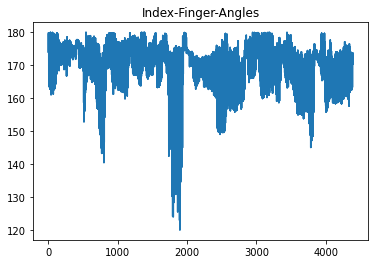

In [156]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(c))]
plt.plot(t1, c)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

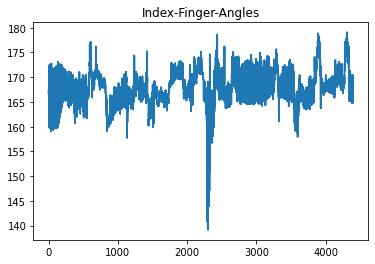

In [157]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(d))]
plt.plot(t1, d)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

In [158]:
yPred = [char for char in stree]
yTrue = ['t','h','e',' ','q','u','i','c','k',' ','b','r','o','w','n',' ','f','o','x',' ','j','u','m','p','s',' ','o','v','e','r',' ','t','h','e',' ','l','a','z','y',' ','d','o','g']

In [160]:
calculate_accuracy(yPred,yTrue)

1.0

PERSON 3:

In [162]:
import time

a=[0]*30
b=[0]*30
c=[]
d=[]
pred5=[]

flag1=-1
flag2=-1
flag3=-1
flag4=-1
flag5=-1
flag6=-1
flag7=-1
flag8=-1
flag9=-1
flag10=-1
cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00,180.00]
lst2=[180.00,180.00,180.00,180.00,180.00]
start_time = time.time()
with mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.6,max_num_hands=2) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        #print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            # Get the number of detected hands
            num_hands = len(results.multi_hand_landmarks)
            
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                # Draw angles to image from joint list
                draw_finger_angles(image, results, joint_list,lst,lst2,a,b,c,d)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    mindex1=find_dis(coord1[0],coord1[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[0]<155.0:
                            flag1=0
                        if lst[0]>155.0 and flag1==0:
                            if ltr[mindex1]=="*":
                                stree=stree[0:-1]
                                pred5.append('back')
                                print('back')
                            else:
                                stree=stree+ltr[mindex1]
                                pred5.append(ltr[mindex1])
                                print(ltr[mindex1])
                            sleep(0.5)
                            flag1=-1
                    if num_hands==2:
                        if num==0:
                            if lst[0]<165.0:
                                flag1=0
                            if lst[0]>165.0 and flag1==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex1]
                                    pred5.append(ltr[mindex1])
                                    print(ltr[mindex1])
                                sleep(0.5)
                                flag1=-1
                        if num==1:
                            if lst2[0]<170.0:
                                flag5=0
                            if lst2[0]>170.0 and flag5==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex1]
                                    pred5.append(ltr[mindex1])
                                    print(ltr[mindex1])
                                sleep(0.5)
                                flag5=-1
                                
                if get_label5b(num,hand,results):
                    text5,coord5=get_label_thumb(num,hand,results)
                    mindex5=find_dis(coord5[0],coord5[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[4]<160.0:
                            flag9=0
                        if lst[4]>160.0 and flag9==0:
                            if ltr[mindex5]=="*":
                                stree=stree[0:-1]
                                pred5.append('back')
                                print('back')
                            else:
                                stree=stree+ltr[mindex5]
                                pred5.append(ltr[mindex5])
                                print(ltr[mindex5])
                            sleep(0.5)
                            flag9=-1
                    if num_hands==2:
                        if num==0:
                            if lst[4]<160.0:
                                flag9=0
                            if lst[4]>160.0 and flag9==0:
                                if ltr[mindex5]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex5]
                                    pred5.append(ltr[mindex5])
                                    print(ltr[mindex5])
                                sleep(0.5)
                                flag9=-1
                        if num==1:
                            if lst2[4]<160.0:
                                flag10=0
                            if lst2[4]>160.0 and flag10==0:
                                if ltr[mindex5]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex5]
                                    pred5.append(ltr[mindex5])
                                    print(ltr[mindex5])
                                sleep(0.5)
                                flag10=-1   
                """"""
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[1]<170.0:
                            flag1=0
                        if lst[1]>170.0 and flag2==0:
                            if ltr[mindex2]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex2]
                            sleep(0.99)
                            flag2=-1
                    if num_hands==2:
                        if num==0:
                            if lst[1]<170.0:
                                flag2=0
                            if lst[1]>170.0 and flag2==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag2=-1
                        if num==1:
                            if lst2[1]<170.0:
                                flag6=0
                            if lst2[1]>170.0 and flag6==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag6=-1
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[2]<170.0:
                            flag1=0
                        if lst[2]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[2]<170.0:
                                flag3=0
                            if lst[2]>170.0 and flag3==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag3=-1
                        if num==1:
                            if lst2[2]<170.0:
                                flag7=0
                            if lst2[2]>170.0 and flag7==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag7=-1
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[3]<170.0:
                            flag1=0
                        if lst[3]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[3]<170.0:
                                flag4=0
                            if lst[3]>170.0 and flag4==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag4=-1
                        if num==1:
                            if lst2[3]<170.0:
                                flag7=0
                            if lst2[3]>170.0 and flag8==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag8=-1
                """"""
        # Calculate the elapsed time
        elapsed_time = int(time.time() - start_time) 
        # Draw the timer text on the image
        timer_text = f"Timer: {elapsed_time} s"
        #cv2.putText(image, timer_text, (image.shape[1] - 200, image.shape[0] - 20),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

t
h
e
 
q
u
i
c
k
 
b
r
o
w
n
 
f
o
x
 
j
u
m
p
s
 
o
v
e
r
 
t
h
e
l
l
a
z
y
 
d
o
g


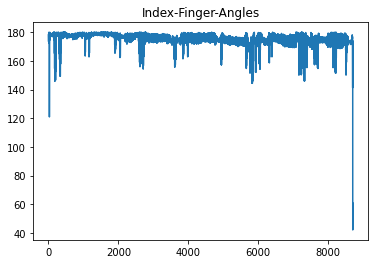

In [163]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(c))]
plt.plot(t1, c)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

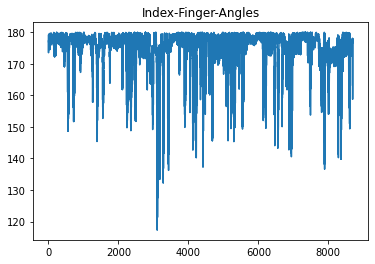

In [164]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(d))]
plt.plot(t1, d)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

In [165]:
yPred = [char for char in stree]
yTrue = ['t','h','e',' ','q','u','i','c','k',' ','b','r','o','w','n',' ','f','o','x',' ','j','u','m','p','s',' ','o','v','e','r',' ','t','h','e',' ','l','a','z','y',' ','d','o','g']

In [166]:
calculate_accuracy(yPred,yTrue)

0.9767441860465116

PERSON 4:

In [169]:
import time

a=[0]*30
b=[0]*30
c=[]
d=[]
pred5=[]

flag1=-1
flag2=-1
flag3=-1
flag4=-1
flag5=-1
flag6=-1
flag7=-1
flag8=-1
flag9=-1
flag10=-1
cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00,180.00]
lst2=[180.00,180.00,180.00,180.00,180.00]
start_time = time.time()
with mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.6,max_num_hands=2) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        #print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            # Get the number of detected hands
            num_hands = len(results.multi_hand_landmarks)
            
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                # Draw angles to image from joint list
                draw_finger_angles(image, results, joint_list,lst,lst2,a,b,c,d)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    mindex1=find_dis(coord1[0],coord1[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[0]<155.0:
                            flag1=0
                        if lst[0]>155.0 and flag1==0:
                            if ltr[mindex1]=="*":
                                stree=stree[0:-1]
                                pred5.append('back')
                                print('back')
                            else:
                                stree=stree+ltr[mindex1]
                                pred5.append(ltr[mindex1])
                                print(ltr[mindex1])
                            sleep(0.5)
                            flag1=-1
                    if num_hands==2:
                        if num==0:
                            if lst[0]<165.0:
                                flag1=0
                            if lst[0]>165.0 and flag1==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex1]
                                    pred5.append(ltr[mindex1])
                                    print(ltr[mindex1])
                                sleep(0.5)
                                flag1=-1
                        if num==1:
                            if lst2[0]<170.0:
                                flag5=0
                            if lst2[0]>170.0 and flag5==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex1]
                                    pred5.append(ltr[mindex1])
                                    print(ltr[mindex1])
                                sleep(0.5)
                                flag5=-1
                                
                if get_label5b(num,hand,results):
                    text5,coord5=get_label_thumb(num,hand,results)
                    mindex5=find_dis(coord5[0],coord5[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[4]<160.0:
                            flag9=0
                        if lst[4]>160.0 and flag9==0:
                            if ltr[mindex5]=="*":
                                stree=stree[0:-1]
                                pred5.append('back')
                                print('back')
                            else:
                                stree=stree+ltr[mindex5]
                                pred5.append(ltr[mindex5])
                                print(ltr[mindex5])
                            sleep(0.5)
                            flag9=-1
                    if num_hands==2:
                        if num==0:
                            if lst[4]<160.0:
                                flag9=0
                            if lst[4]>160.0 and flag9==0:
                                if ltr[mindex5]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex5]
                                    pred5.append(ltr[mindex5])
                                    print(ltr[mindex5])
                                sleep(0.5)
                                flag9=-1
                        if num==1:
                            if lst2[4]<160.0:
                                flag10=0
                            if lst2[4]>160.0 and flag10==0:
                                if ltr[mindex5]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex5]
                                    pred5.append(ltr[mindex5])
                                    print(ltr[mindex5])
                                sleep(0.5)
                                flag10=-1   
                """"""
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[1]<170.0:
                            flag1=0
                        if lst[1]>170.0 and flag2==0:
                            if ltr[mindex2]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex2]
                            sleep(0.99)
                            flag2=-1
                    if num_hands==2:
                        if num==0:
                            if lst[1]<170.0:
                                flag2=0
                            if lst[1]>170.0 and flag2==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag2=-1
                        if num==1:
                            if lst2[1]<170.0:
                                flag6=0
                            if lst2[1]>170.0 and flag6==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag6=-1
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[2]<170.0:
                            flag1=0
                        if lst[2]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[2]<170.0:
                                flag3=0
                            if lst[2]>170.0 and flag3==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag3=-1
                        if num==1:
                            if lst2[2]<170.0:
                                flag7=0
                            if lst2[2]>170.0 and flag7==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag7=-1
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[3]<170.0:
                            flag1=0
                        if lst[3]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[3]<170.0:
                                flag4=0
                            if lst[3]>170.0 and flag4==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag4=-1
                        if num==1:
                            if lst2[3]<170.0:
                                flag7=0
                            if lst2[3]>170.0 and flag8==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag8=-1
                """"""
        # Calculate the elapsed time
        elapsed_time = int(time.time() - start_time) 
        # Draw the timer text on the image
        timer_text = f"Timer: {elapsed_time} s"
        #cv2.putText(image, timer_text, (image.shape[1] - 200, image.shape[0] - 20),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

t
h
e
 
q
u
i
c
k
 
b
r
o
w
n
 
f
o
x
 
j
u
m
p
s
 
o
v
e
r
 
t
h
e
 
l
a
z
y
 
d
o
g


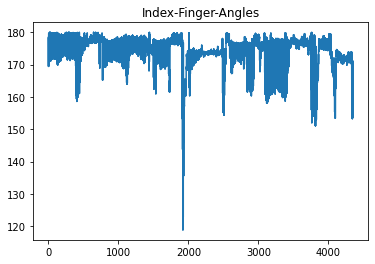

In [170]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(c))]
plt.plot(t1, c)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

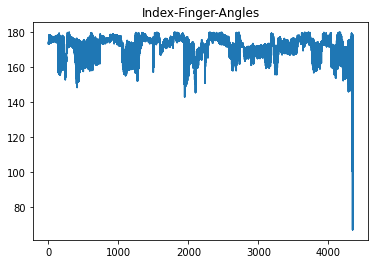

In [171]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(d))]
plt.plot(t1, d)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

In [175]:
yPred = [char for char in stree]
yTrue = ['t','h','e',' ','q','u','i','c','k',' ','b','r','o','w','n',' ','f','o','x',' ','j','u','m','p','s',' ','o','v','e','r',' ','t','h','e',' ','l','a','z','y',' ','d','o','g']

In [176]:
calculate_accuracy(yPred,yTrue)

1.0

PERSON 5:

In [179]:
import time

a=[0]*30
b=[0]*30
c=[]
d=[]
pred5=[]

flag1=-1
flag2=-1
flag3=-1
flag4=-1
flag5=-1
flag6=-1
flag7=-1
flag8=-1
flag9=-1
flag10=-1
cap = cv2.VideoCapture(1)
stree=""
lst=[180.00,180.00,180.00,180.00,180.00]
lst2=[180.00,180.00,180.00,180.00,180.00]
start_time = time.time()
with mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.6,max_num_hands=2) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        #image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        #print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            # Get the number of detected hands
            num_hands = len(results.multi_hand_landmarks)
            
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS)
                # Draw angles to image from joint list
                draw_finger_angles(image, results, joint_list,lst,lst2,a,b,c,d)
                #Render left or right detection
                """
                if get_label(num,hand,results):
                    text,coord=get_label(num,hand,results)
                    mindex=find_dis(coord[0],coord[1])
                    #cv2.putText(image,str(coord[0])+","+str(coord[1]),coord,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                """
                if get_label1b(num,hand,results):
                    text1,coord1=get_label_index(num,hand,results)
                    mindex1=find_dis(coord1[0],coord1[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[0]<155.0:
                            flag1=0
                        if lst[0]>155.0 and flag1==0:
                            if ltr[mindex1]=="*":
                                stree=stree[0:-1]
                                pred5.append('back')
                                print('back')
                            else:
                                stree=stree+ltr[mindex1]
                                pred5.append(ltr[mindex1])
                                print(ltr[mindex1])
                            sleep(0.5)
                            flag1=-1
                    if num_hands==2:
                        if num==0:
                            if lst[0]<165.0:
                                flag1=0
                            if lst[0]>165.0 and flag1==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex1]
                                    pred5.append(ltr[mindex1])
                                    print(ltr[mindex1])
                                sleep(0.5)
                                flag1=-1
                        if num==1:
                            if lst2[0]<170.0:
                                flag5=0
                            if lst2[0]>170.0 and flag5==0:
                                if ltr[mindex1]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex1]
                                    pred5.append(ltr[mindex1])
                                    print(ltr[mindex1])
                                sleep(0.5)
                                flag5=-1
                                
                if get_label5b(num,hand,results):
                    text5,coord5=get_label_thumb(num,hand,results)
                    mindex5=find_dis(coord5[0],coord5[1])
                    #cv2.putText(image,str(coord1[0])+","+str(coord1[1]),coord1,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[4]<160.0:
                            flag9=0
                        if lst[4]>160.0 and flag9==0:
                            if ltr[mindex5]=="*":
                                stree=stree[0:-1]
                                pred5.append('back')
                                print('back')
                            else:
                                stree=stree+ltr[mindex5]
                                pred5.append(ltr[mindex5])
                                print(ltr[mindex5])
                            sleep(0.5)
                            flag9=-1
                    if num_hands==2:
                        if num==0:
                            if lst[4]<160.0:
                                flag9=0
                            if lst[4]>160.0 and flag9==0:
                                if ltr[mindex5]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex5]
                                    pred5.append(ltr[mindex5])
                                    print(ltr[mindex5])
                                sleep(0.5)
                                flag9=-1
                        if num==1:
                            if lst2[4]<160.0:
                                flag10=0
                            if lst2[4]>160.0 and flag10==0:
                                if ltr[mindex5]=="*":
                                    stree=stree[0:-1]
                                    pred5.append('back')
                                    print('back')
                                else:
                                    stree=stree+ltr[mindex5]
                                    pred5.append(ltr[mindex5])
                                    print(ltr[mindex5])
                                sleep(0.5)
                                flag10=-1   
                """"""
                if get_label2b(num,hand,results):
                    text2,coord2=get_label_middle(num,hand,results)
                    mindex2=find_dis(coord2[0],coord2[1])
                    #cv2.putText(image,str(coord2[0])+","+str(coord2[1]),coord2,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[1]<170.0:
                            flag1=0
                        if lst[1]>170.0 and flag2==0:
                            if ltr[mindex2]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex2]
                            sleep(0.99)
                            flag2=-1
                    if num_hands==2:
                        if num==0:
                            if lst[1]<170.0:
                                flag2=0
                            if lst[1]>170.0 and flag2==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag2=-1
                        if num==1:
                            if lst2[1]<170.0:
                                flag6=0
                            if lst2[1]>170.0 and flag6==0:
                                if ltr[mindex2]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex2]
                                sleep(0.99)
                                flag6=-1
                if get_label3b(num,hand,results):
                    text3,coord3=get_label_ring(num,hand,results)
                    mindex3=find_dis(coord3[0],coord3[1])
                    #cv2.putText(image,str(coord3[0])+","+str(coord3[1]),coord3,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[2]<170.0:
                            flag1=0
                        if lst[2]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[2]<170.0:
                                flag3=0
                            if lst[2]>170.0 and flag3==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag3=-1
                        if num==1:
                            if lst2[2]<170.0:
                                flag7=0
                            if lst2[2]>170.0 and flag7==0:
                                if ltr[mindex3]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex3]
                                sleep(0.99)
                                flag7=-1
                if get_label4b(num,hand,results):
                    text4,coord4=get_label_pinky(num,hand,results)
                    mindex4=find_dis(coord4[0],coord4[1])
                    #cv2.putText(image,str(coord4[0])+","+str(coord4[1]),coord4,cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)# font size, color,line size,line type
                    if num_hands==1:
                        if lst[3]<170.0:
                            flag1=0
                        if lst[3]>170.0 and flag3==0:
                            if ltr[mindex3]=="*":
                                stree=stree[0:-1]
                            else:
                                stree=stree+ltr[mindex3]
                            sleep(0.99)
                            flag3=-1
                    if num_hands==2:
                        if num==0:
                            if lst[3]<170.0:
                                flag4=0
                            if lst[3]>170.0 and flag4==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag4=-1
                        if num==1:
                            if lst2[3]<170.0:
                                flag7=0
                            if lst2[3]>170.0 and flag8==0:
                                if ltr[mindex4]=="*":
                                    stree=stree[0:-1]
                                else:
                                    stree=stree+ltr[mindex4]
                                sleep(0.99)
                                flag8=-1
                """"""
        # Calculate the elapsed time
        elapsed_time = int(time.time() - start_time) 
        # Draw the timer text on the image
        timer_text = f"Timer: {elapsed_time} s"
        #cv2.putText(image, timer_text, (image.shape[1] - 200, image.shape[0] - 20),cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        cv2.putText(image,stree,(10,50),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,255,255),2,cv2.LINE_AA)
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

t
h
e
 
q
u
i
c
k
 
b
r
o
w
n
 
f
o
x
 
j
u
m
p
s
 
o
v
e
r
 
t
h
e
 
l
a
z
y
 
d
o
g


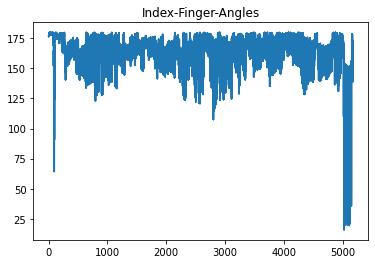

In [180]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(c))]
plt.plot(t1, c)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

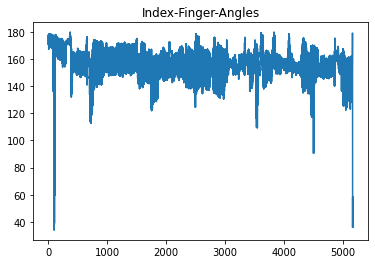

In [181]:
import matplotlib.pyplot as plt
t1=[i for i in range(len(d))]
plt.plot(t1, d)#X-Y axis
plt.title("Index-Finger-Angles")
#plt.savefig('T4b.png')
plt.show()

In [182]:
yPred = [char for char in stree]
yTrue = ['t','h','e',' ','q','u','i','c','k',' ','b','r','o','w','n',' ','f','o','x',' ','j','u','m','p','s',' ','o','v','e','r',' ','t','h','e',' ','l','a','z','y',' ','d','o','g']

In [183]:
calculate_accuracy(yPred,yTrue)

1.0